# Importing Modules

In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc, precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_val_predict


In [461]:
!pip install pandoc


In [462]:
import pandoc

In [365]:
!pip install scikit-learn==1.3.0

# Loading Data 

In [366]:
df = pd.read_csv("crop.csv")

In [367]:
df.head()

,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL,CROP
0,90.0,42.0,43.0,21.0,82.0,6.5,203.0,rice
1,85.0,58.0,41.0,22.0,80.0,7.0,227.0,rice
2,60.0,55.0,44.0,23.0,82.0,7.8,264.0,rice
3,74.0,35.0,40.0,26.0,80.0,7.0,243.0,rice
4,78.0,42.0,42.0,20.0,82.0,7.6,263.0,rice


In [368]:
df.tail()

,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL,CROP
2396,43.685741,13.449040,253.415466,15.931577,46.977683,7.081783,256.922983,wheat
2397,42.824988,12.371845,258.921071,17.359929,45.463647,6.974514,256.266133,wheat
2398,47.581428,12.574671,258.296629,15.270635,40.512941,7.044163,252.189214,wheat
2399,41.915093,14.054842,259.211594,14.775843,40.876699,7.375927,250.862623,wheat
2400,47.440885,13.429322,259.071899,17.988414,49.039197,7.210755,257.781379,wheat


In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NITROGEN     2401 non-null   float64
 1   PHOSPHORUS   2401 non-null   float64
 2   POTASSIUM    2401 non-null   float64
 3   TEMPERATURE  2401 non-null   float64
 4   HUMIDITY     2401 non-null   float64
 5   PH           2401 non-null   float64
 6   RAINFALL     2401 non-null   float64
 7   CROP         2401 non-null   object 
dtypes: float64(7), object(1)
memory usage: 150.2+ KB


In [370]:
df.nunique()

NITROGEN       338
PHOSPHORUS     318
POTASSIUM      274
TEMPERATURE    237
HUMIDITY       284
PH             260
RAINFALL       450
CROP            24
dtype: int64

In [371]:
df.isnull().sum()

NITROGEN       0
PHOSPHORUS     0
POTASSIUM      0
TEMPERATURE    0
HUMIDITY       0
PH             0
RAINFALL       0
CROP           0
dtype: int64

# EDA

In [372]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NITROGEN,2401.0,52.373524,36.741070,0.000000,22.0,40.0,88.000000,140.00000
PHOSPHORUS,2401.0,49.601664,33.960197,4.008959,22.0,47.0,66.000000,145.00000
POTASSIUM,2401.0,64.197952,72.042132,5.000000,21.0,35.0,53.000000,259.86554
TEMPERATURE,2401.0,25.595679,5.586720,9.000000,22.0,26.0,29.000000,44.00000
HUMIDITY,2401.0,69.857755,22.228702,14.000000,55.0,78.0,89.000000,100.00000
PH,2401.0,6.518775,0.760413,3.500000,6.0,6.5,7.000000,9.90000
RAINFALL,2401.0,111.778904,61.292085,20.000000,66.0,101.0,148.807492,299.00000


In [373]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
NITROGEN,2401.0,NaN,NaN,NaN,52.373524,36.74107,0.0,22.0,40.0,88.0,140.0
PHOSPHORUS,2401.0,NaN,NaN,NaN,49.601664,33.960197,4.008959,22.0,47.0,66.0,145.0
POTASSIUM,2401.0,NaN,NaN,NaN,64.197952,72.042132,5.0,21.0,35.0,53.0,259.86554
TEMPERATURE,2401.0,NaN,NaN,NaN,25.595679,5.58672,9.0,22.0,26.0,29.0,44.0
HUMIDITY,2401.0,NaN,NaN,NaN,69.857755,22.228702,14.0,55.0,78.0,89.0,100.0
PH,2401.0,NaN,NaN,NaN,6.518775,0.760413,3.5,6.0,6.5,7.0,9.9
RAINFALL,2401.0,NaN,NaN,NaN,111.778904,61.292085,20.0,66.0,101.0,148.807492,299.0
CROP,2401,24,wheat,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [374]:
cat_cols= df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

In [375]:
df.isin([np.inf, -np.inf]).sum()
#we will remove all these 27 rows


NITROGEN       0
PHOSPHORUS     0
POTASSIUM      0
TEMPERATURE    0
HUMIDITY       0
PH             0
RAINFALL       0
CROP           0
dtype: int64

In [376]:
df = df.replace([np.inf, -np.inf], np.nan).dropna(how='any')

In [377]:
df.isin([np.inf, -np.inf]).sum()

NITROGEN       0
PHOSPHORUS     0
POTASSIUM      0
TEMPERATURE    0
HUMIDITY       0
PH             0
RAINFALL       0
CROP           0
dtype: int64

In [378]:
def bar_and_box(df,num_cols):
    
    for col in num_cols:
        print(col)
        print('Skew :', round(df[col].skew(), 2))
        plt.figure(figsize = (15, 4))
        plt.subplot(1, 2, 1)
        df[col].hist(grid=False)
        plt.ylabel('count')
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.show()

NITROGEN
Skew : 0.43


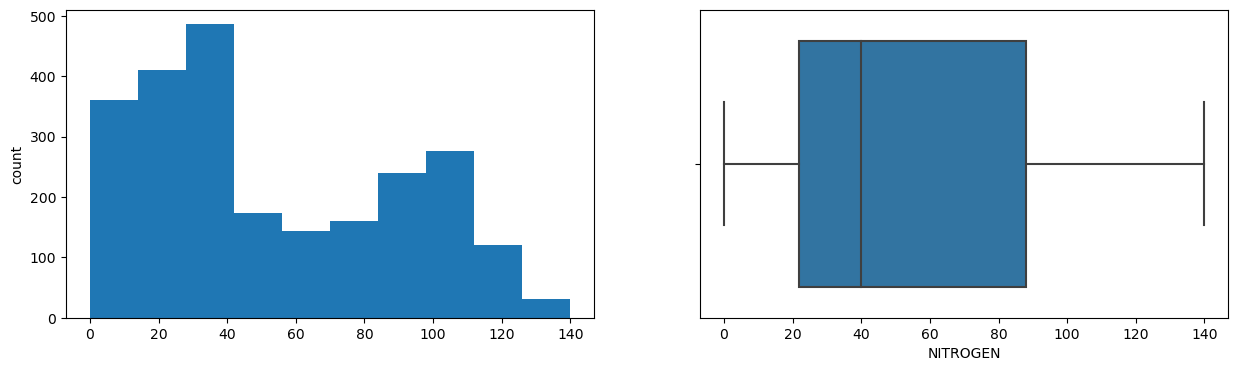

PHOSPHORUS
Skew : 0.98


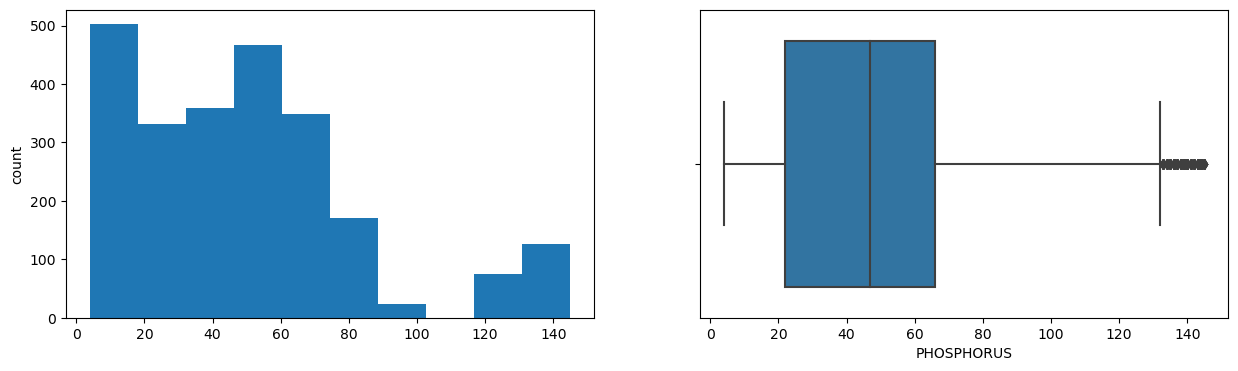

POTASSIUM
Skew : 1.69


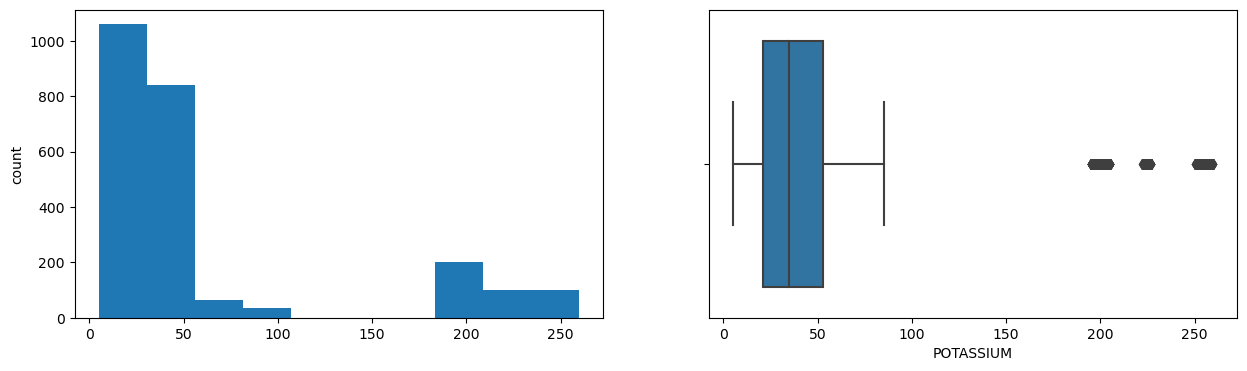

TEMPERATURE
Skew : 0.12


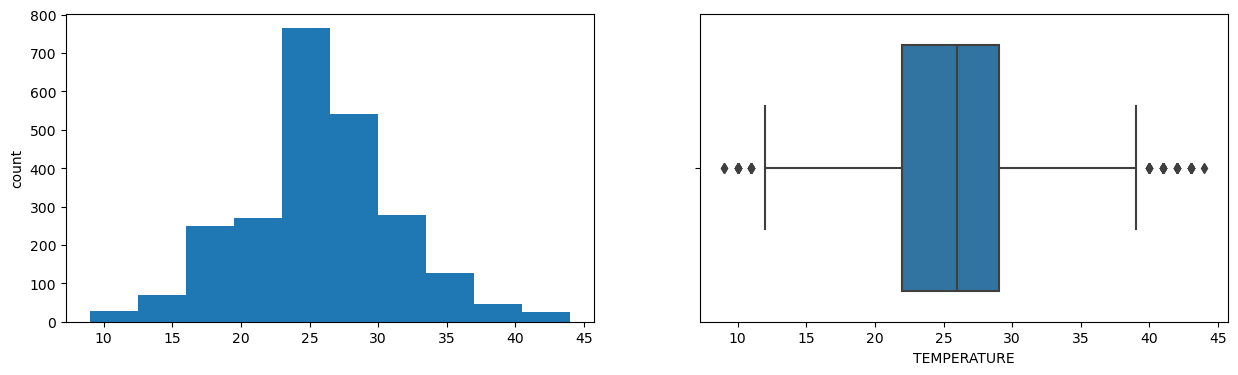

HUMIDITY
Skew : -0.89


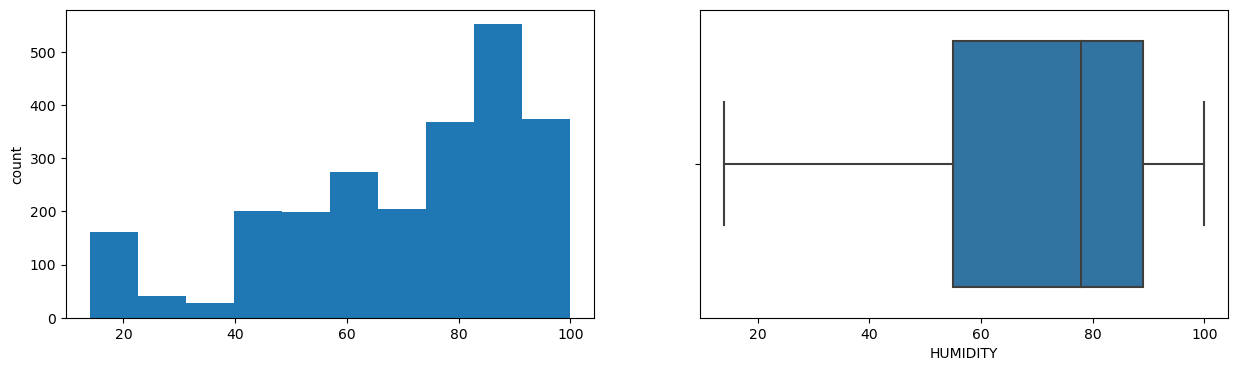

PH
Skew : 0.13


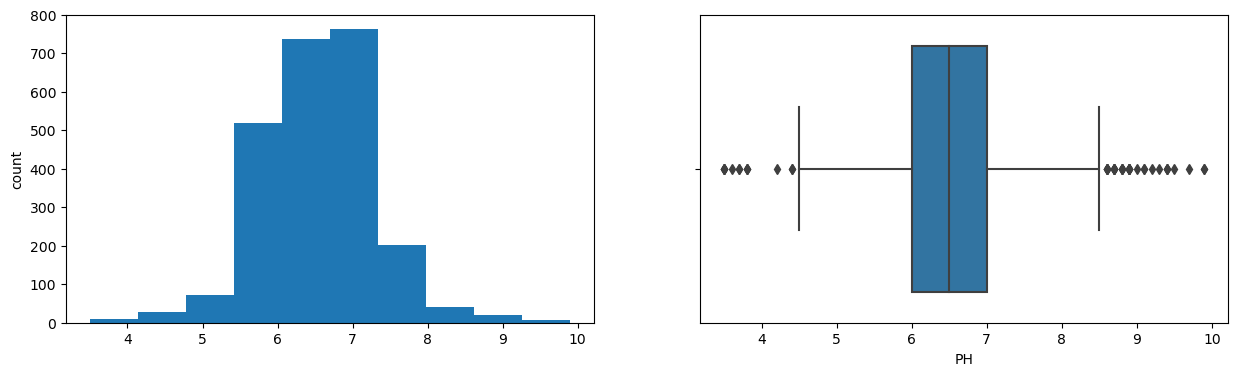

RAINFALL
Skew : 0.88


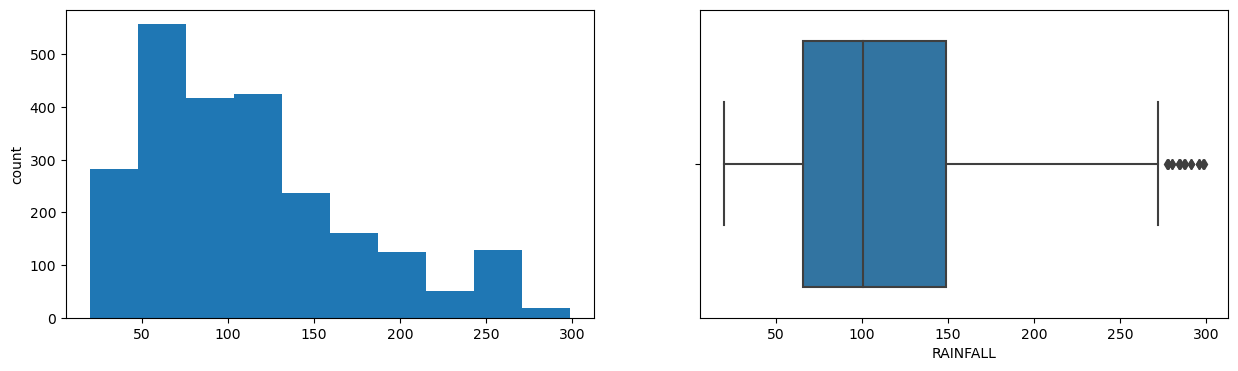

In [379]:
bar_and_box(df,num_cols)

In [380]:
#removing outliers from the data
for col in num_cols:
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR))]



NITROGEN
Skew : 0.37


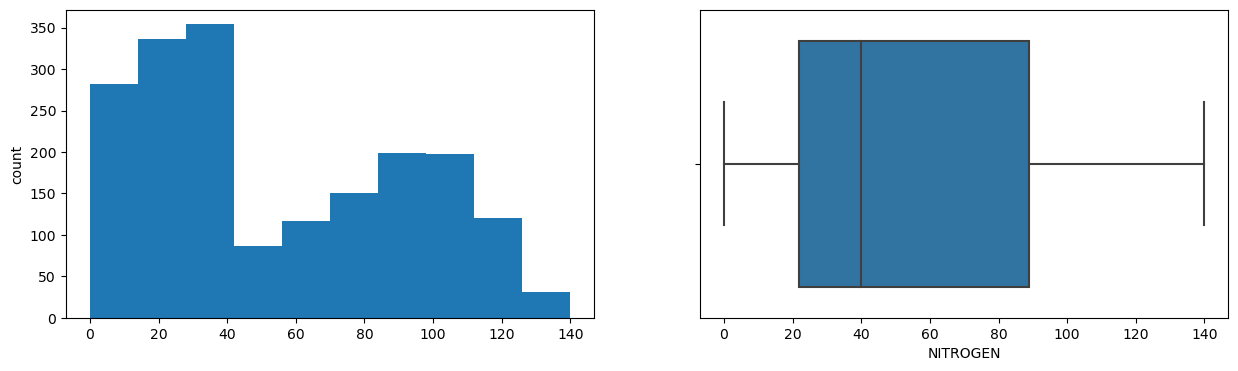

PHOSPHORUS
Skew : -0.03


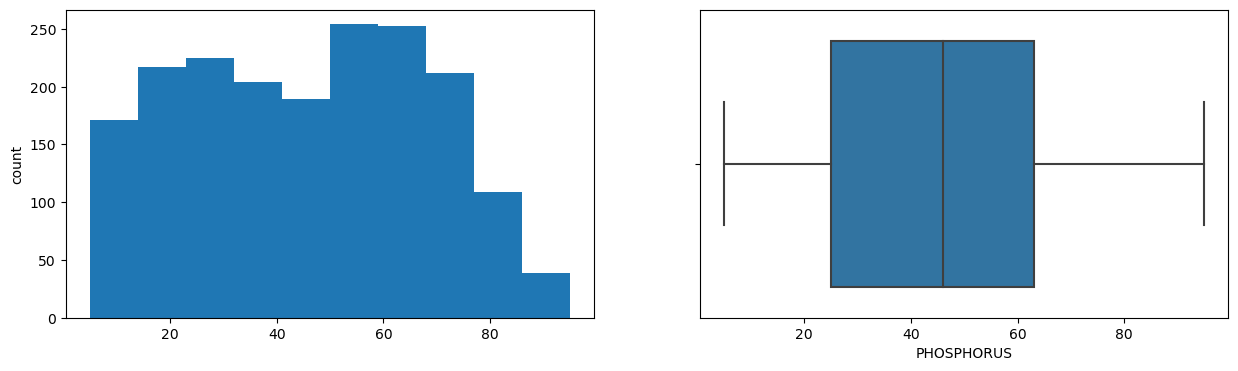

POTASSIUM
Skew : 1.04


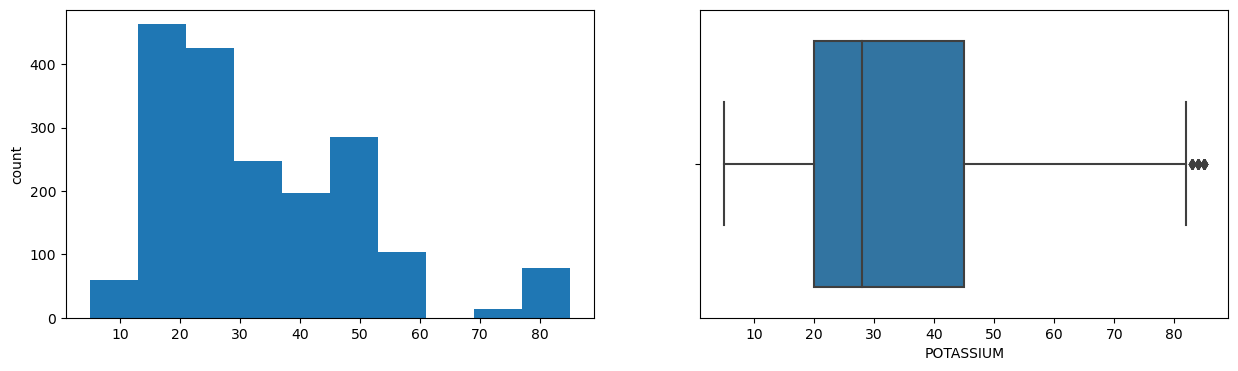

TEMPERATURE
Skew : -0.02


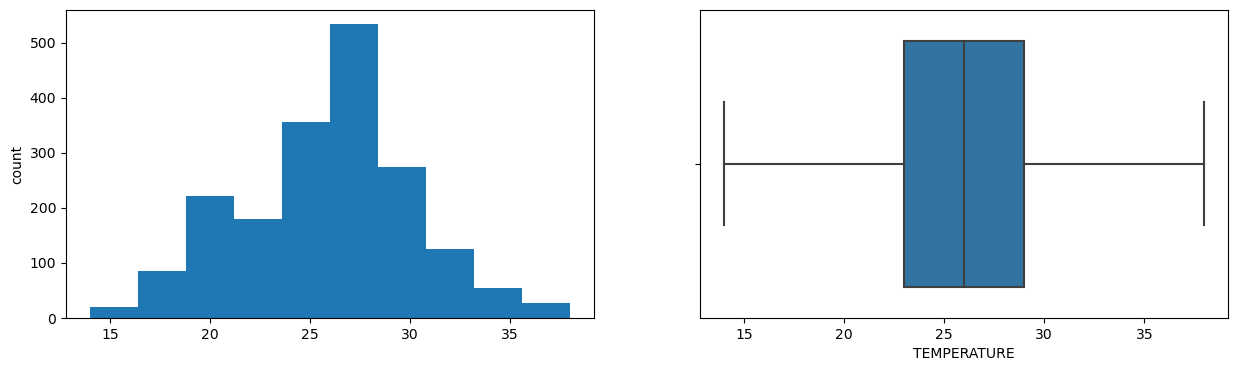

HUMIDITY
Skew : -0.96


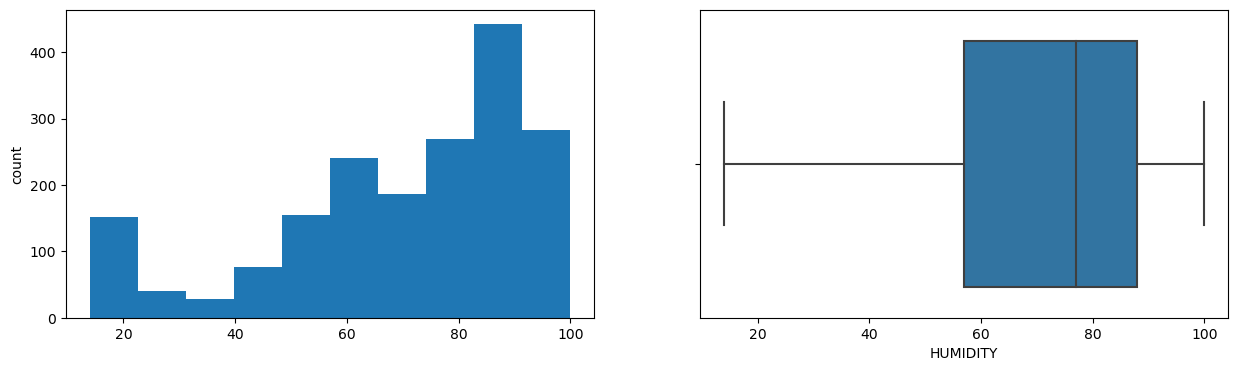

PH
Skew : -0.04


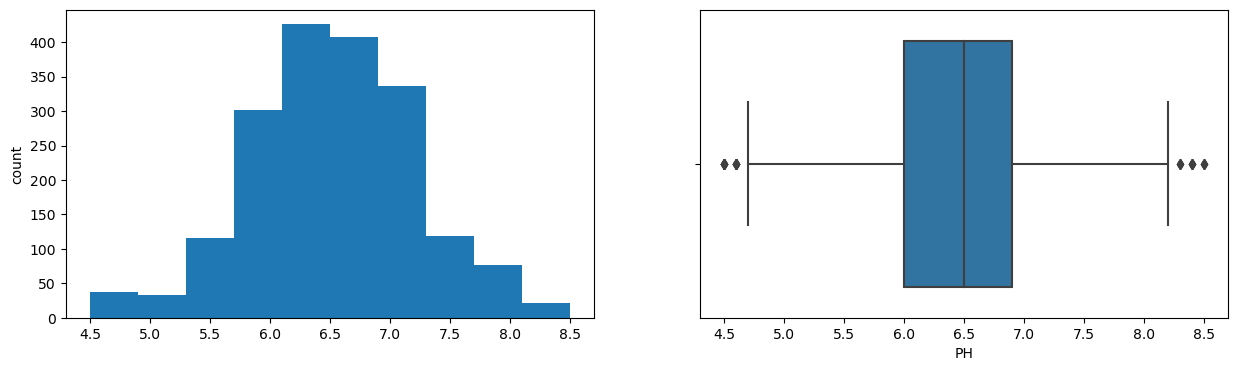

RAINFALL
Skew : 0.68


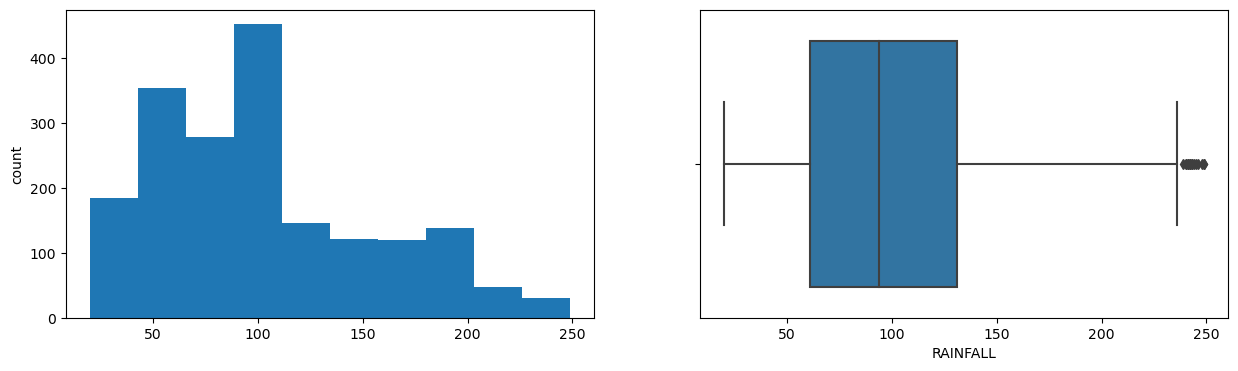

In [381]:
bar_and_box(df,num_cols)

In [382]:
#removing skewness
idx_to_skew = []
def transform_(df,col):
    if df[col].skew() < 0:
        idx_to_skew.append(0)
        df[col] = np.square(df[col])
    else:
        idx_to_skew.append(1)
        
        df[col] = np.sqrt(df[col])


In [383]:
for col in num_cols:
    transform_(df,col)
        

In [384]:
idx_to_skew

[1, 0, 1, 0, 0, 0, 1]

NITROGEN
Skew : -0.18


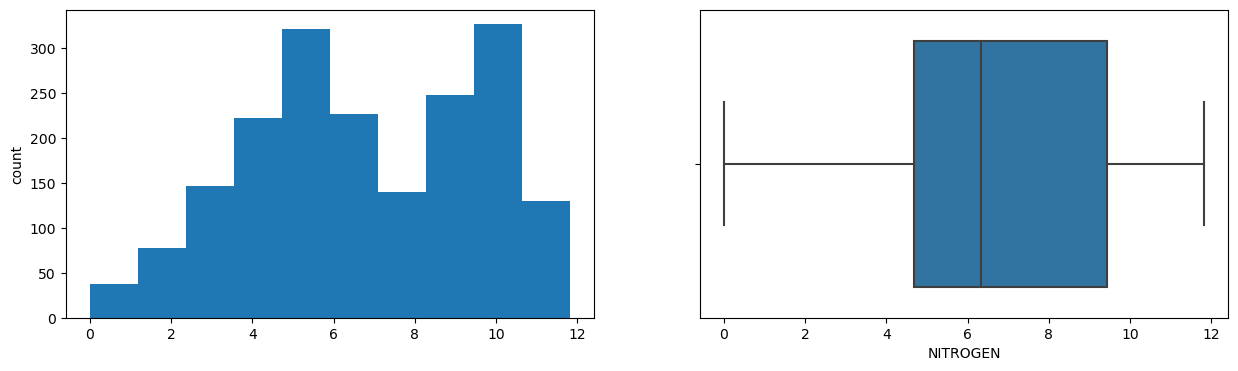

PHOSPHORUS
Skew : 0.66


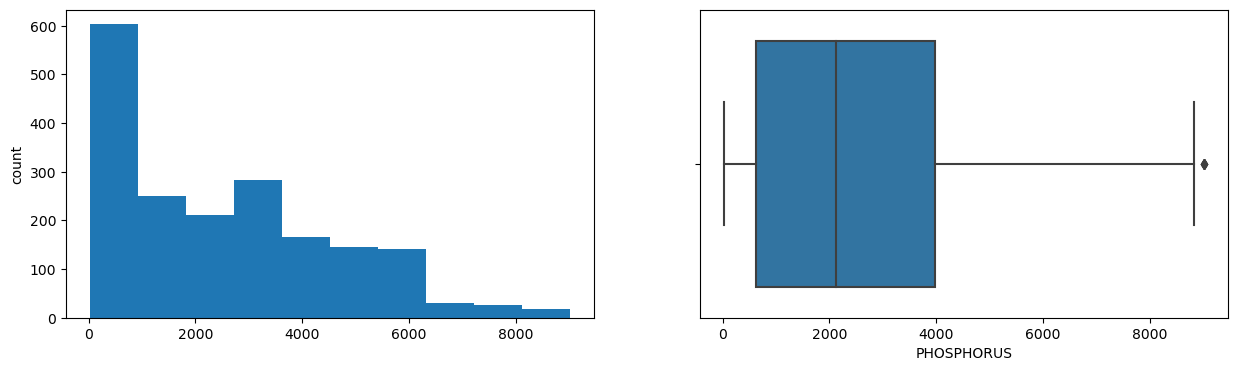

POTASSIUM
Skew : 0.48


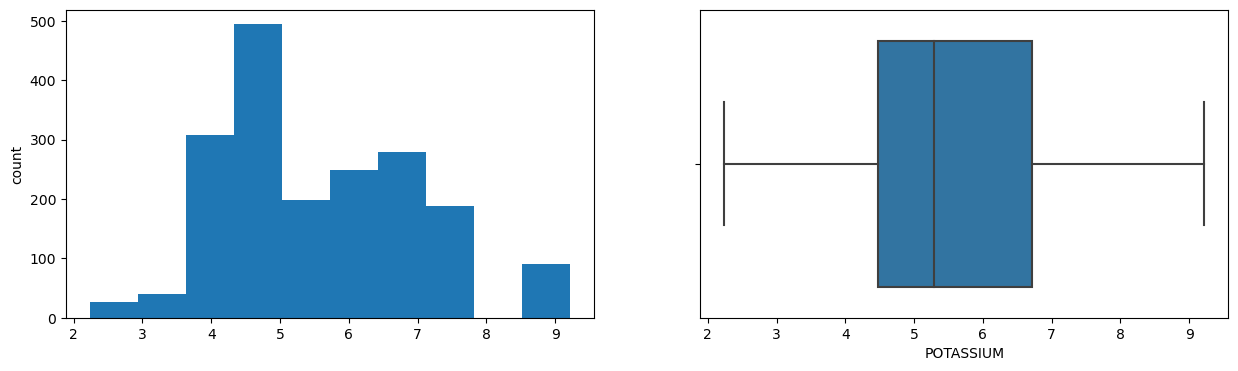

TEMPERATURE
Skew : 0.47


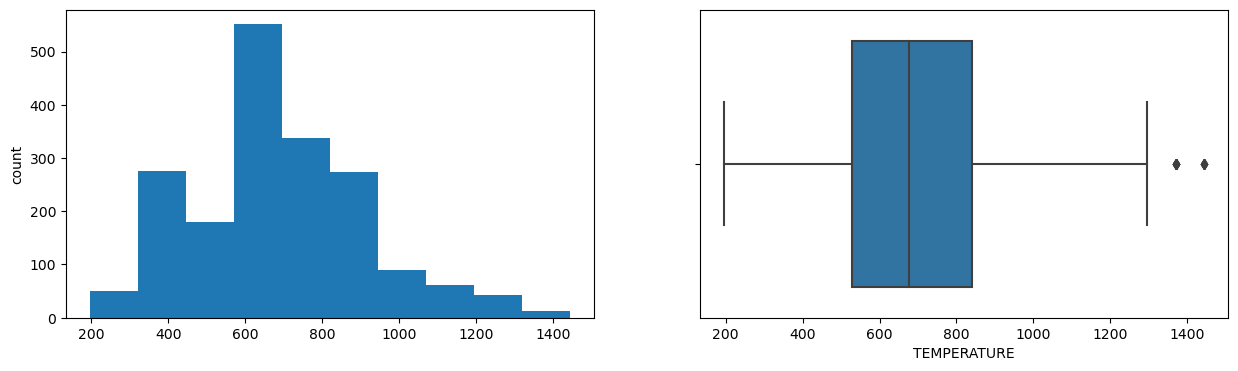

HUMIDITY
Skew : -0.38


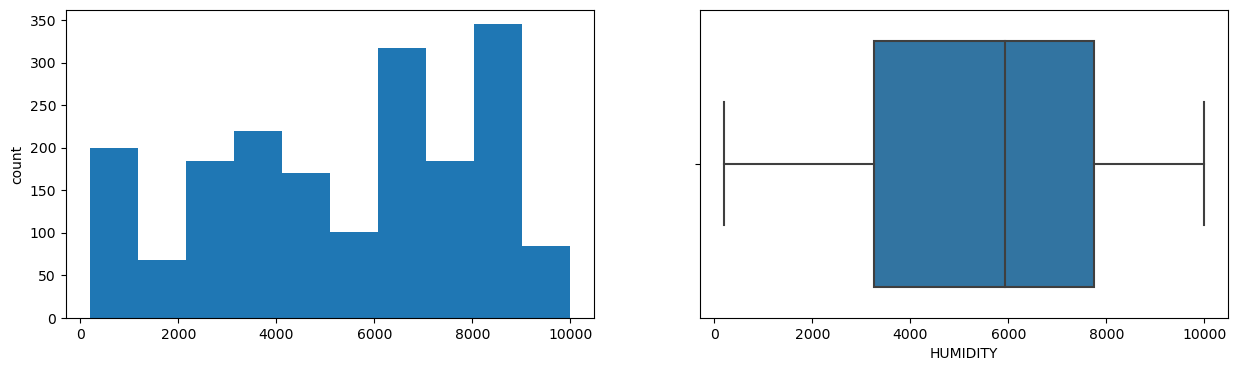

PH
Skew : 0.29


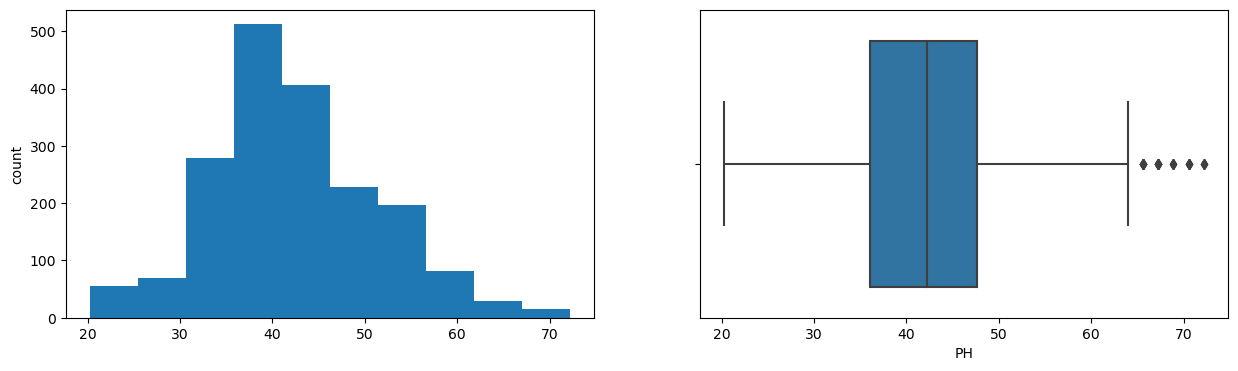

RAINFALL
Skew : 0.18


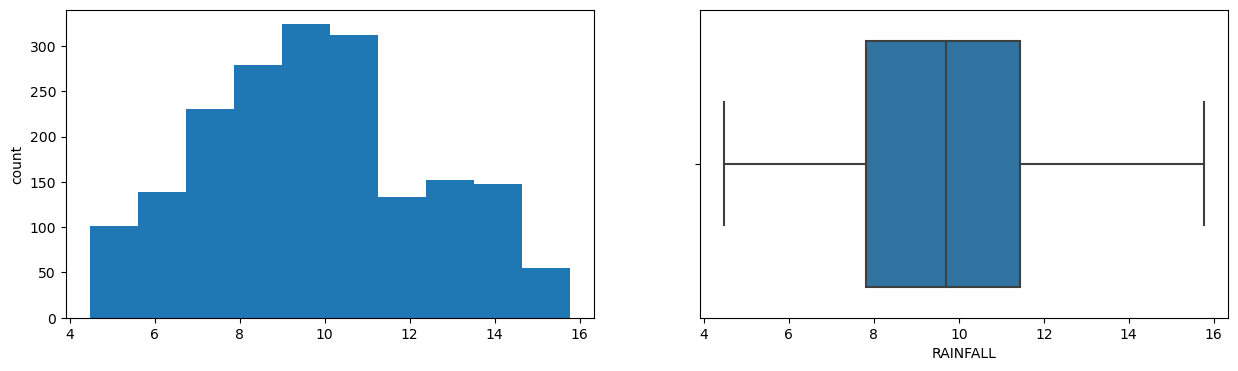

In [385]:
bar_and_box(df,num_cols)

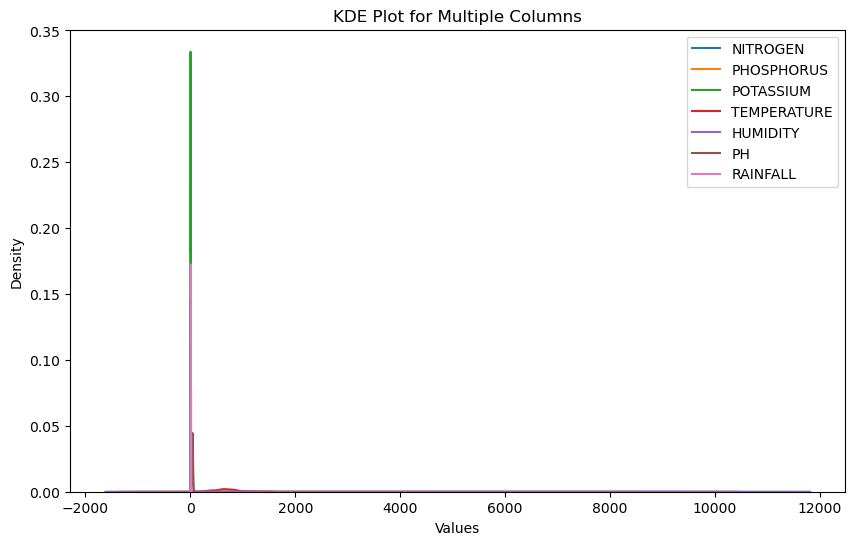

In [386]:
fig, ax = plt.subplots(figsize=(10, 6))

for col in num_cols:
    sns.kdeplot(df[col], ax=ax, label=col)

ax.set_xlabel('Values')
ax.set_ylabel('Density')
ax.set_title('KDE Plot for Multiple Columns')
ax.legend()

# Show the plot
plt.show()

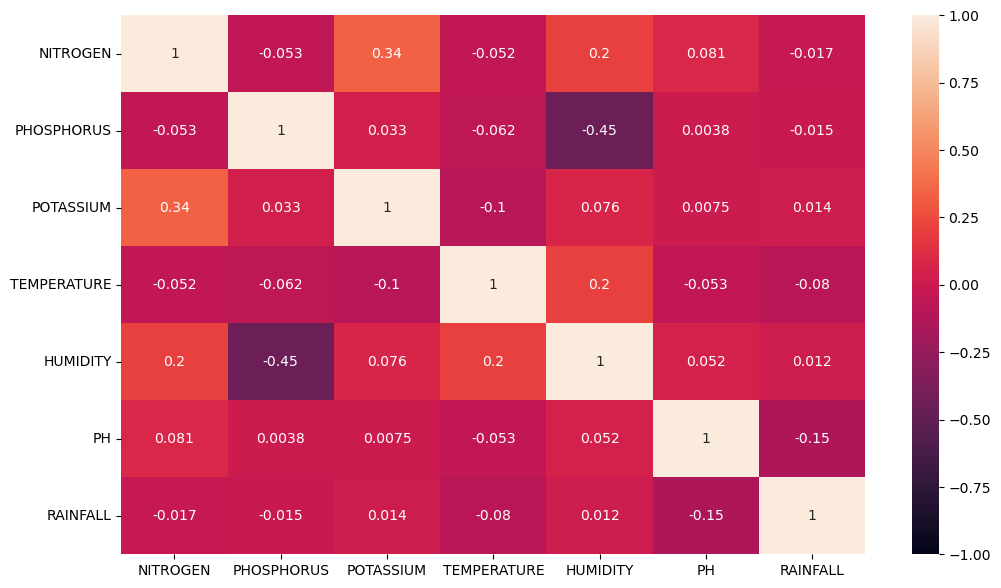

In [387]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.drop(['CROP'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [388]:
features = df.iloc[:,:7]
labels = df["CROP"]





In [389]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(features,labels,test_size = 0.25)


In [390]:
X_train.head()

,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL
338,5.000000,3969.0,4.472136,256.0,441.0,30.25,9.746794
1782,6.928203,3844.0,6.855655,625.0,8649.0,46.24,13.190906
2027,8.717798,1936.0,6.708204,625.0,7056.0,44.89,13.000000
1437,10.954451,64.0,6.782330,900.0,8281.0,44.89,5.291503
729,4.582576,3969.0,4.690416,625.0,4624.0,47.61,8.660254


In [391]:
X_test.head()

,NITROGEN,PHOSPHORUS,POTASSIUM,TEMPERATURE,HUMIDITY,PH,RAINFALL
1351,9.486833,256.0,6.708204,625.0,6561.0,39.69,7.141428
2073,9.486833,3481.0,5.916080,576.0,8100.0,50.41,13.228757
443,1.000000,5776.0,4.123106,784.0,2704.0,36.00,12.124356
234,5.567764,6241.0,8.660254,361.0,256.0,67.24,9.486833
124,10.000000,2304.0,4.000000,676.0,4489.0,30.25,8.660254


In [392]:
Y_train.head()

338     kidneybeans
1782         papaya
2027           jute
1437      muskmelon
729       blackgram
Name: CROP, dtype: object

In [393]:
Y_test.head()

1351    watermelon
2073          jute
443     pigeonpeas
234       chickpea
124          maize
Name: CROP, dtype: object

In [394]:
X_test.isin([np.inf, -np.inf]).sum()


NITROGEN       0
PHOSPHORUS     0
POTASSIUM      0
TEMPERATURE    0
HUMIDITY       0
PH             0
RAINFALL       0
dtype: int64

In [395]:
X_train.isin([np.inf, -np.inf]).sum()

NITROGEN       0
PHOSPHORUS     0
POTASSIUM      0
TEMPERATURE    0
HUMIDITY       0
PH             0
RAINFALL       0
dtype: int64

In [396]:
df.isin([np.inf, -np.inf]).sum()

NITROGEN       0
PHOSPHORUS     0
POTASSIUM      0
TEMPERATURE    0
HUMIDITY       0
PH             0
RAINFALL       0
CROP           0
dtype: int64

In [397]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [398]:
X_train

array([[0.42409446, 0.43822222, 0.3201941 , ..., 0.0249898 , 0.19230769,
        0.46647028],
       [0.58764253, 0.42433333, 0.66150242, ..., 0.8621991 , 0.49980769,
        0.77105413],
       [0.73943397, 0.21233333, 0.6403882 , ..., 0.6997144 , 0.47384615,
        0.75417115],
       ...,
       [0.53644178, 0.371     , 0.23439835, ..., 0.76988984, 0.55288462,
        0.18441605],
       [0.78199155, 0.11822222, 0.39578168, ..., 0.26652387, 0.52615385,
        0.82029722],
       [0.18966081, 0.60566667, 0.33600854, ..., 0.0249898 , 0.21365385,
        0.32838246]])

In [399]:
X_test

array([[0.80466267, 0.02566667, 0.6403882 , ..., 0.64922481, 0.37384615,
        0.23606185],
       [0.80466267, 0.384     , 0.52695986, ..., 0.80620155, 0.58      ,
        0.77440149],
       [0.08481889, 0.639     , 0.27021465, ..., 0.25581395, 0.30288462,
        0.67673256],
       ...,
       [0.82671231, 0.62222222, 0.69234855, ..., 0.55375357, 0.21365385,
        0.56516376],
       [0.34971725, 0.384     , 0.27021465, ..., 0.03396573, 0.23538462,
        0.62439669],
       [0.74428277, 0.35822222, 0.33600854, ..., 0.53855569, 0.44826923,
        0.39549832]])

In [400]:
acc = []
model = []


# Decision Tree 

In [401]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier(random_state = 42)
DecisionTree.fit(X_train,Y_train)


DecisionTreeClassifier(random_state=42)

In [402]:
def evaluate_model(model_, X_test, Y_test, model_name="Model"):
    # Make predictions on the test set
    predicted_values = model_.predict(X_test)
    print(predicted_values)

    # Calculate accuracy
    accuracy = metrics.accuracy_score(Y_test, predicted_values)
    acc.append(accuracy)
    model.append(model_name)
    print(f"{model_name}'s accuracy is: {accuracy * 100}%")

    # Generate classification report
    print(classification_report(Y_test, predicted_values))

    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_test, predicted_values)
    print("Confusion Matrix:\n", conf_matrix)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(set(Y_test)))
    plt.xticks(tick_marks, set(Y_test))
    plt.yticks(tick_marks, set(Y_test))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # Calculate AUC-ROC for multi-class
    y_prob = model_.predict_proba(X_test)
    roc_auc = roc_auc_score(Y_test, y_prob, multi_class='ovr')
    print("AUC-ROC: {}".format(roc_auc))

    # Plot ROC Curve for multi-class
    plt.figure(figsize=(8, 6))
    for i in range(len(set(Y_test))):
        fpr, tpr, _ = metrics.roc_curve(Y_test, y_prob[:, i], pos_label=i)
        plt.plot(fpr, tpr, lw=2, label='Class {} (area = {:0.2f})'.format(i, auc(fpr, tpr)))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Multi-Class')
    plt.legend(loc="lower right")
    plt.show()

    # Plot Precision-Recall Curve for multi-class
    plt.figure(figsize=(8, 6))
    for i in range(len(set(Y_test))):
        precision, recall, _ = precision_recall_curve(Y_test == i, y_prob[:, i])
        plt.plot(recall, precision, lw=2, label='Class {}'.format(i))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve for Multi-Class')
    plt.legend(loc="lower left")
    plt.show()

    # Cross-Validation with the best estimator
    cv_scores = cross_val_score(model_, X_train, Y_train, cv=5, scoring='accuracy')
    print("Cross-Validation Accuracy Scores: ", cv_scores)
    print("Mean Cross-Validation Accuracy: ", cv_scores.mean())

    # Cross-Validated Predictions with the best estimator
    cv_predictions = cross_val_predict(model_, X_train, Y_train, cv=5)

    # Cross-Validated Confusion Matrix with the best estimator
    cv_conf_matrix = confusion_matrix(Y_train, cv_predictions)
    print("Cross-Validated Confusion Matrix:\n", cv_conf_matrix)

    # Cross-Validated Classification Report with the best estimator
    cv_classification_report = classification_report(Y_train, cv_predictions)
    print("Cross-Validated Classification Report:\n", cv_classification_report)

    # Precision, Recall, F1-Score from Cross-Validated Predictions with the best estimator
    precision = metrics.precision_score(Y_train, cv_predictions, average='macro')
    recall = metrics.recall_score(Y_train, cv_predictions, average='macro')
    f1_score = metrics.f1_score(Y_train, cv_predictions, average='macro')
    print("Cross-Validated Precision: {}".format(precision))
    print("Cross-Validated Recall: {}".format(recall))
    print("Cross-Validated F1-Score: {}".format(f1_score))

['watermelon' 'jute' 'pigeonpeas' 'chickpea' 'cotton' 'kidneybeans'
 'banana' 'papaya' 'coffee' 'pomegranate' 'banana' 'jute' 'rice' 'cotton'
 'pomegranate' 'chickpea' 'coconut' 'mango' 'pomegranate' 'jute' 'papaya'
 'maize' 'kidneybeans' 'jute' 'banana' 'chickpea' 'maize' 'coconut'
 'maize' 'lentil' 'blackgram' 'lentil' 'pomegranate' 'watermelon'
 'watermelon' 'mothbeans' 'blackgram' 'rice' 'watermelon' 'pomegranate'
 'coffee' 'pigeonpeas' 'pomegranate' 'coconut' 'banana' 'lentil' 'lentil'
 'rice' 'rice' 'banana' 'orange' 'maize' 'lentil' 'papaya' 'pigeonpeas'
 'lentil' 'muskmelon' 'coffee' 'jute' 'coconut' 'blackgram' 'blackgram'
 'coffee' 'chickpea' 'lentil' 'muskmelon' 'kidneybeans' 'jute'
 'pomegranate' 'kidneybeans' 'watermelon' 'pomegranate' 'kidneybeans'
 'watermelon' 'cotton' 'orange' 'cotton' 'mango' 'pigeonpeas' 'lentil'
 'jute' 'blackgram' 'maize' 'cotton' 'pomegranate' 'muskmelon' 'orange'
 'pomegranate' 'blackgram' 'pomegranate' 'watermelon' 'watermelon' 'mango'
 'orange'

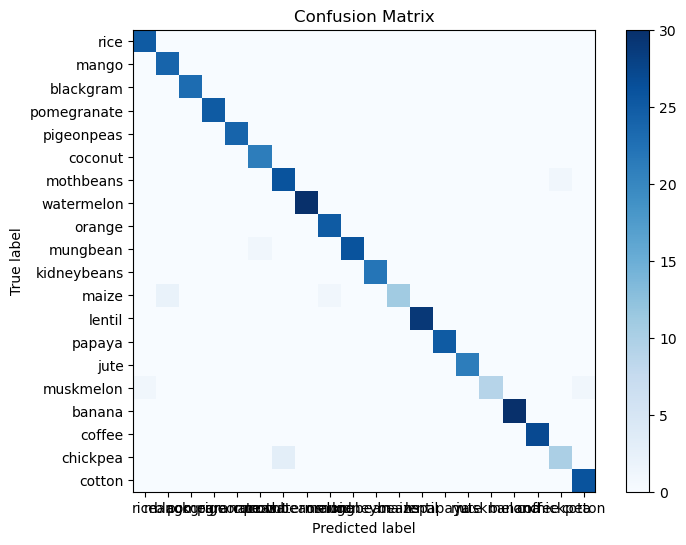

AUC-ROC: 0.9819146030138171


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sk

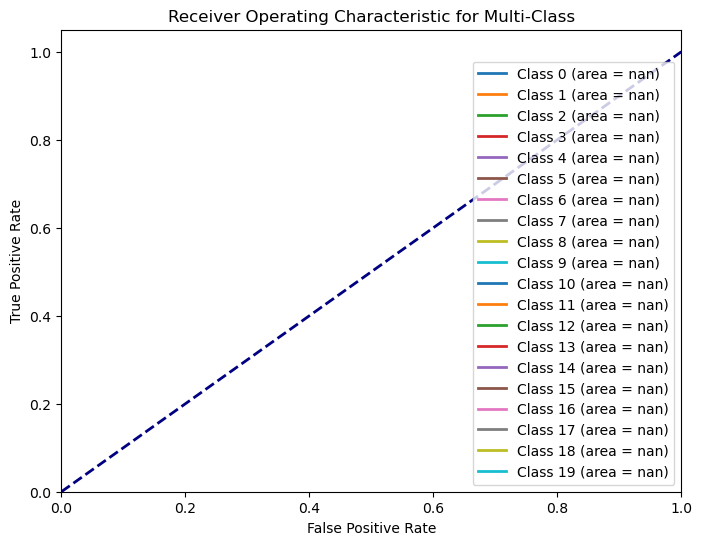

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: N

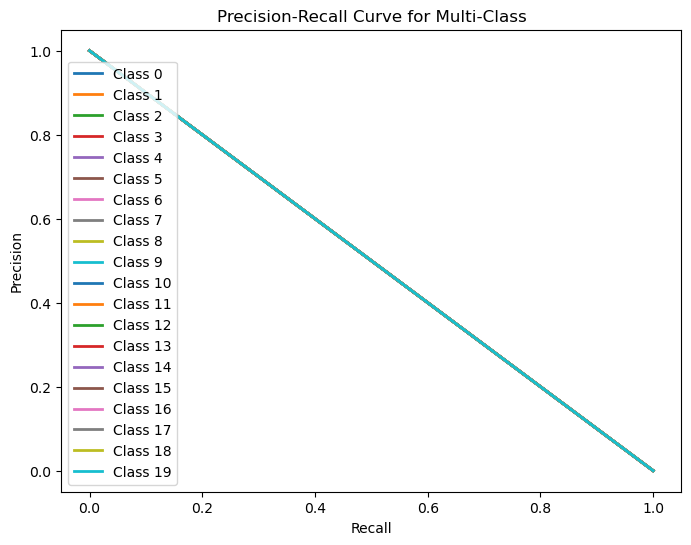

Cross-Validation Accuracy Scores:  [0.98576512 0.99288256 0.97508897 0.99288256 0.975     ]
Mean Cross-Validation Accuracy:  0.98432384341637
Cross-Validated Confusion Matrix:
 [[75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 67  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0 74  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0 76  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 79  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 74  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 73  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 78  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  2  0  0 47  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 71  0  0  0  0  0  0  0]
 [ 0

In [403]:
evaluate_model(DecisionTree, X_test, Y_test, model_name="Decision Tree")

#Hyper parameter Tuning -> Decision Tree


In [404]:
from sklearn.model_selection import GridSearchCV

In [405]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best','random'],
    'max_depth': [ 10,20,30,40,50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,10],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                
                           verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Get the best estimator from the grid search
best_decision_tree = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)




Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Best cross-validation accuracy:  0.9857498729028977


['watermelon' 'jute' 'pigeonpeas' 'chickpea' 'cotton' 'kidneybeans'
 'banana' 'papaya' 'coffee' 'pomegranate' 'banana' 'jute' 'rice' 'cotton'
 'pomegranate' 'chickpea' 'coconut' 'mango' 'pomegranate' 'jute' 'papaya'
 'maize' 'kidneybeans' 'jute' 'banana' 'chickpea' 'maize' 'coconut'
 'maize' 'lentil' 'blackgram' 'lentil' 'pomegranate' 'watermelon'
 'watermelon' 'mothbeans' 'blackgram' 'rice' 'watermelon' 'pomegranate'
 'coffee' 'pigeonpeas' 'pomegranate' 'coconut' 'banana' 'lentil' 'lentil'
 'rice' 'jute' 'banana' 'orange' 'maize' 'lentil' 'papaya' 'pigeonpeas'
 'lentil' 'muskmelon' 'coffee' 'jute' 'coconut' 'blackgram' 'blackgram'
 'coffee' 'chickpea' 'lentil' 'muskmelon' 'kidneybeans' 'jute'
 'pomegranate' 'kidneybeans' 'watermelon' 'pomegranate' 'kidneybeans'
 'watermelon' 'cotton' 'orange' 'cotton' 'mango' 'pigeonpeas' 'lentil'
 'jute' 'blackgram' 'maize' 'cotton' 'pomegranate' 'muskmelon' 'orange'
 'pomegranate' 'blackgram' 'pomegranate' 'watermelon' 'watermelon' 'mango'
 'orange'

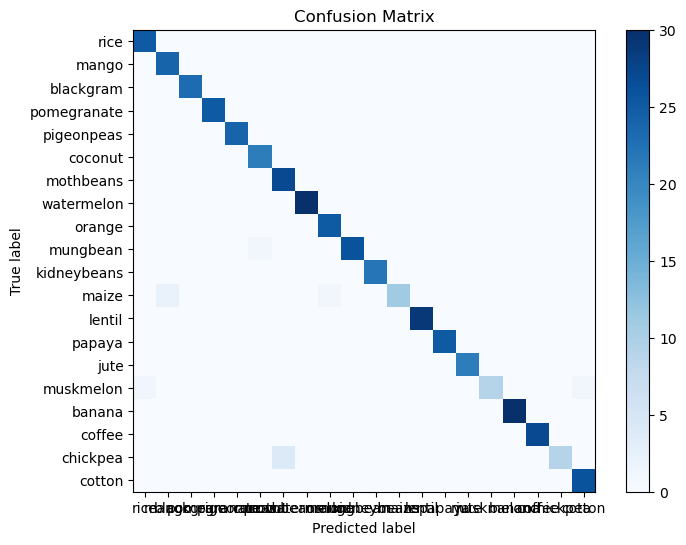

AUC-ROC: 0.9896691718904005


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sk

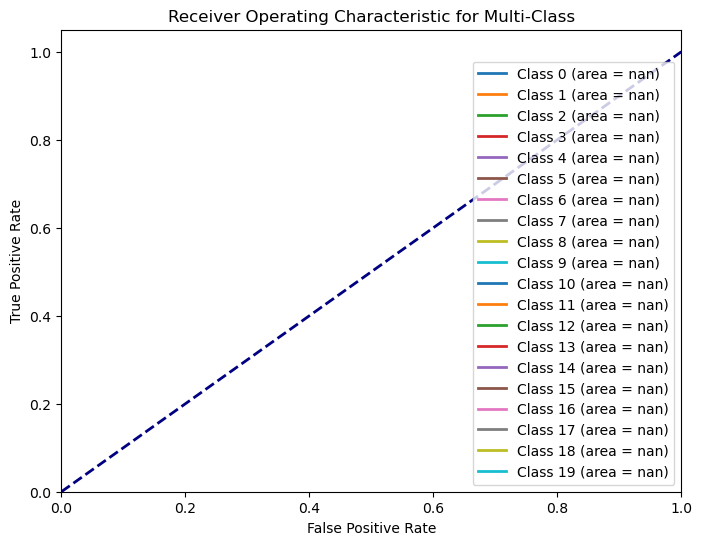

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: N

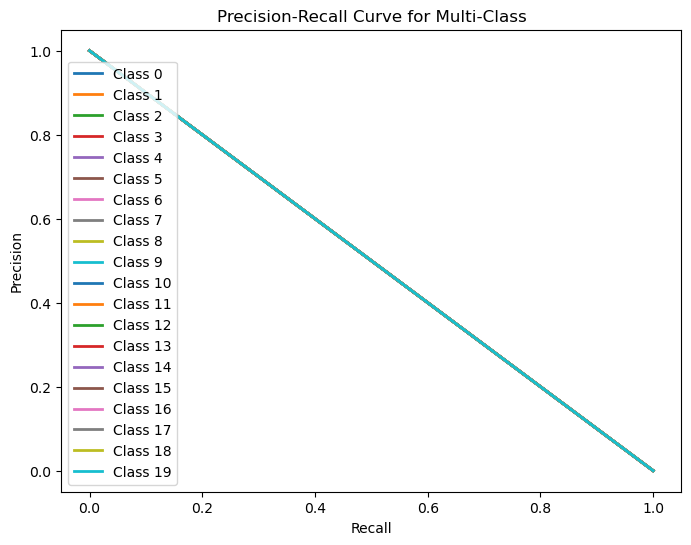

Cross-Validation Accuracy Scores:  [0.99288256 0.99288256 0.97864769 0.98576512 0.97857143]
Mean Cross-Validation Accuracy:  0.9857498729028977
Cross-Validated Confusion Matrix:
 [[75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 67  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0 75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 76  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 79  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 72  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 74  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 73  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 78  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  2  0  0 47  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 71  0  0  0  0  0  0  0]
 [

In [406]:
evaluate_model(best_decision_tree,X_test,Y_test,"best decision tree")

# Logistic Regression

In [407]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(max_iter = 100)

LogReg.fit(X_train,Y_train)

predicted_values = LogReg.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's accuracy is: {}%".format(x * 100))
print(classification_report(Y_test,predicted_values))

Logistic Regression's accuracy is: 95.3091684434968%
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        25
   blackgram       0.92      0.96      0.94        24
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        25
      coffee       0.96      1.00      0.98        24
      cotton       0.95      1.00      0.98        21
        jute       0.74      0.96      0.84        27
 kidneybeans       0.88      0.93      0.90        30
      lentil       0.93      1.00      0.96        25
       maize       1.00      0.96      0.98        27
       mango       0.96      1.00      0.98        22
   mothbeans       1.00      0.71      0.83        14
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00      1.00        11
  pigeonpeas       0.93     

['watermelon' 'jute' 'pigeonpeas' 'chickpea' 'maize' 'kidneybeans'
 'banana' 'papaya' 'coffee' 'pomegranate' 'banana' 'jute' 'rice' 'cotton'
 'pomegranate' 'chickpea' 'coconut' 'mango' 'pomegranate' 'jute' 'papaya'
 'maize' 'pigeonpeas' 'jute' 'banana' 'chickpea' 'maize' 'coconut' 'maize'
 'lentil' 'blackgram' 'lentil' 'pomegranate' 'watermelon' 'watermelon'
 'mothbeans' 'blackgram' 'jute' 'watermelon' 'pomegranate' 'coffee'
 'pigeonpeas' 'pomegranate' 'coconut' 'banana' 'lentil' 'lentil' 'jute'
 'jute' 'banana' 'orange' 'maize' 'lentil' 'papaya' 'pigeonpeas' 'lentil'
 'muskmelon' 'coffee' 'jute' 'coconut' 'blackgram' 'blackgram' 'coffee'
 'chickpea' 'lentil' 'muskmelon' 'kidneybeans' 'jute' 'pomegranate'
 'kidneybeans' 'watermelon' 'pomegranate' 'kidneybeans' 'watermelon'
 'cotton' 'orange' 'cotton' 'mango' 'pigeonpeas' 'lentil' 'jute'
 'blackgram' 'maize' 'cotton' 'pomegranate' 'muskmelon' 'orange'
 'pomegranate' 'blackgram' 'pomegranate' 'watermelon' 'watermelon' 'mango'
 'orange' '

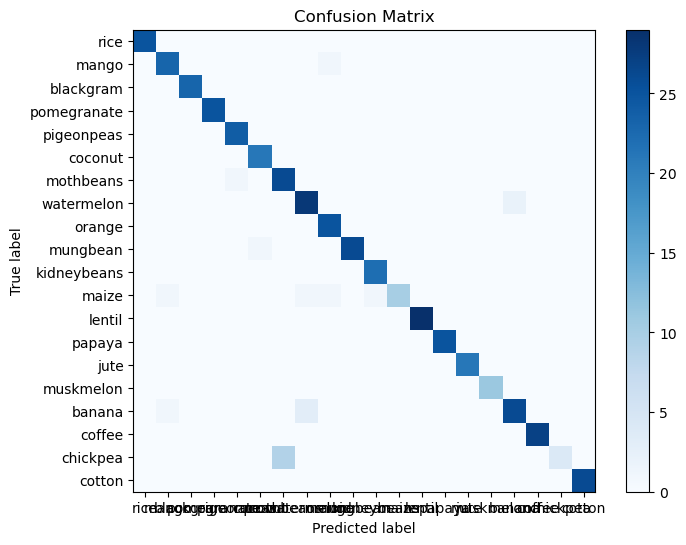

AUC-ROC: 0.9977993180890772


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sk

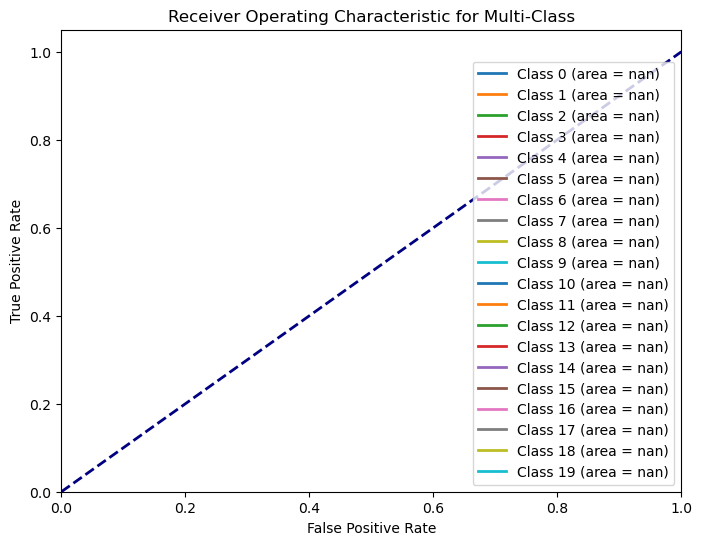

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: N

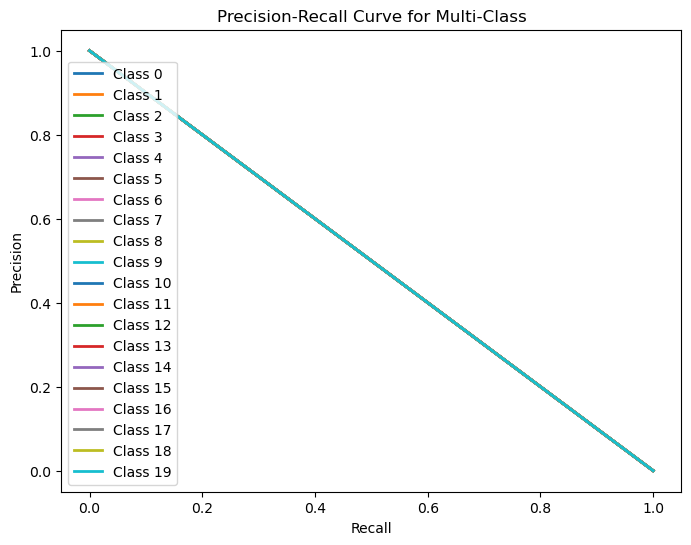

Cross-Validation Accuracy Scores:  [0.94661922 0.9252669  0.91103203 0.9430605  0.92857143]
Mean Cross-Validation Accuracy:  0.9309100152516523
Cross-Validated Confusion Matrix:
 [[75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 76  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 78  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0 69  0  0  0  0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0 68  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6  0  0  0 66  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 78  0  0  0  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0  1  4  1 10 29  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 71  0  0  0  0  0  0  0]
 [

In [408]:
evaluate_model(LogReg,X_test,Y_test,"Logistic Regression")

In [409]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                         
                           verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Get the best estimator from the grid search
best_log_reg = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, s

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py

[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=none, solver=sag; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=0.1, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=none, solver=sag; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=0.1, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.1, max_iter=100, penalty=none, solver=saga; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .....C=0.1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=0.1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=0.1, max_iter=100, penalty=none, solver=saga; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=0.1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=0.1, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.1, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.1, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=2

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.1, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.1, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ....C=0.1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py

[CV] END ....C=0.1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py

[CV] END ....C=0.1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=0.1, max_iter=200, penalty=none, solver=sag; total time=   0.1s
[CV] END ......C=0.1, max_iter=200, penalty=none, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=0.1, max_iter=200, penalty=none, solver=sag; total time=   0.1s
[CV] END ......C=0.1, max_iter=200, penalty=none, solver=sag; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, max_iter=200, penalty=none, solver=sag; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.1, max_iter=200, penalty=none, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.1, max_iter=200, penalty=none, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .....C=0.1, max_iter=200, penalty=none, solver=saga; total time=   0.1s
[CV] END .....C=0.1, max_iter=200, penalty=none, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=0.1, max_iter=200, penalty=none, solver=saga; total time=   0.1s
[CV] END ..C=0.1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.1, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.1, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=3

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=300, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.1, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ....C=0.1, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py

[CV] END ....C=0.1, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=0.1, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=0.1, max_iter=300, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.1, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py

[CV] END ......C=0.1, max_iter=300, penalty=none, solver=sag; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, max_iter=300, penalty=none, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, max_iter=300, penalty=none, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, max_iter=300, penalty=none, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=0.1, max_iter=300, penalty=none, solver=sag; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.1, max_iter=300, penalty=none, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.1, max_iter=300, penalty=none, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.1, max_iter=300, penalty=none, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=0.1, max_iter=300, penalty=none, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=0.1, max_iter=300, penalty=none, solver=saga; total time=   0.2s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=1

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=1

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ..C=1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..C=1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ..C=1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..C=1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ..C=1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ......C=1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\ana

[CV] END ......C=1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=none, solver=sag; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn

[CV] END ........C=1, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=none, solver=sag; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn

[CV] END ........C=1, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn

[CV] END .......C=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=1, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_it

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=200, penalty=l1, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=200, penalty=l1, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=200, penalty=l1, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=200, penalty=l1, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=200, penalty=l1, solver=saga; total time=   0.1s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=2

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ..C=1, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..C=1, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ..C=1, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..C=1, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ..C=1, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ......C=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

[CV] END ......C=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

[CV] END ......C=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.

[CV] END ........C=1, max_iter=200, penalty=none, solver=sag; total time=   0.1s
[CV] END ........C=1, max_iter=200, penalty=none, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ........C=1, max_iter=200, penalty=none, solver=sag; total time=   0.1s
[CV] END ........C=1, max_iter=200, penalty=none, solver=sag; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ........C=1, max_iter=200, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, max_iter=200, penalty=none, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=1, max_iter=200, penalty=none, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=1, max_iter=200, penalty=none, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=1, max_iter=200, penalty=none, solver=saga; total time=   0.2s
[CV] END .......C=1, max_iter=200, penalty=none, solver=saga; total time=   0.1s
[CV] END ....C=1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, max_iter=3

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........C=1, max_iter=300, penalty=l1, solver=saga; total time=   0.4s
[CV] END .........C=1, max_iter=300, penalty=l1, solver=saga; total time=   0.3s
[CV] END ....C=1, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, max_iter=3

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ..C=1, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..C=1, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ..C=1, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..C=1, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ..C=1, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ......C=1, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as s

[CV] END ......C=1, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ......C=1, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=1, max_iter=300, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=1, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..C=1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\ana

[CV] END ........C=1, max_iter=300, penalty=none, solver=sag; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ........C=1, max_iter=300, penalty=none, solver=sag; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ........C=1, max_iter=300, penalty=none, solver=sag; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ........C=1, max_iter=300, penalty=none, solver=sag; total time=   0.1s
[CV] END ........C=1, max_iter=300, penalty=none, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=1, max_iter=300, penalty=none, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=1, max_iter=300, penalty=none, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=1, max_iter=300, penalty=none, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=1, max_iter=300, penalty=none, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=1, max_iter=300, penalty=none, solver=saga; total time=   0.2s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END ...C=10, max_iter=1

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=10, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=10, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .C=10, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=10, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .C=10, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=10, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py

[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=10, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=none, solver=sag; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=10, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=none, solver=sag; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=10, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, max_iter=100, penalty=none, solver=saga; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=10, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, max_iter=100, penalty=none, solver=saga; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=10, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, max_iter=2

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=200, penalty=l1, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=200, penalty=l1, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=200, penalty=l1, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=200, penalty=l1, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=200, penalty=l1, solver=saga; total time=   0.2s
[CV] END ...C=10, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=2

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=10, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .C=10, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=10, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .C=10, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIM

[CV] END .....C=10, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py

[CV] END .....C=10, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350:

[CV] END .....C=10, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=10, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=none, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=10, max_iter=200, penalty=none, solver=sag; total time=   0.1s
[CV] END .......C=10, max_iter=200, penalty=none, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=10, max_iter=200, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=none, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, max_iter=200, penalty=none, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, max_iter=200, penalty=none, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, max_iter=200, penalty=none, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=10, max_iter=200, penalty=none, solver=saga; total time=   0.1s
[CV] END ......C=10, max_iter=200, penalty=none, solver=saga; total time=   0.1s
[CV] END ...C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, max_iter=3

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=300, penalty=l1, solver=saga; total time=   0.3s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=300, penalty=l1, solver=saga; total time=   0.3s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=300, penalty=l1, solver=saga; total time=   0.3s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=300, penalty=l1, solver=saga; total time=   0.4s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=10, max_iter=300, penalty=l1, solver=saga; total time=   0.4s
[CV] END ...C=10, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=3

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=10, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .C=10, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .C=10, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .C=10, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIM

[CV] END .....C=10, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .....C=10, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py

[CV] END .....C=10, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .....C=10, max_iter=300, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=10, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .C=10, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, max_iter=300, penalty=none, solver=sag; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, max_iter=300, penalty=none, solver=sag; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .......C=10, max_iter=300, penalty=none, solver=sag; total time=   0.1s
[CV] END .......C=10, max_iter=300, penalty=none, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=10, max_iter=300, penalty=none, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, max_iter=300, penalty=none, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, max_iter=300, penalty=none, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, max_iter=300, penalty=none, solver=saga; total time=   0.3s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=10, max_iter=300, penalty=none, solver=saga; total time=   0.3s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......C=10, max_iter=300, penalty=none, solver=saga; total time=   0.2s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.6s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.4s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.5s
[CV] END ........C=100, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END .......C=100, max_iter=100, penalty=l1, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=100, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=liblinear; t

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=100, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ....C=100, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=100, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=100, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py

[CV] END ....C=100, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=100, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=none, solver=sag; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=100, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=none, solver=sag; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=100, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=100, max_iter=100, penalty=none, solver=saga; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .....C=100, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=100, max_iter=100, penalty=none, solver=saga; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=100, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=100, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=100, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=100, max_iter=2

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=200, penalty=l1, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=200, penalty=l1, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=200, penalty=l1, solver=saga; total time=   0.3s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=200, penalty=l1, solver=saga; total time=   0.3s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=200, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=100, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] END ......C=100, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] END ......C=100, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ......C=100, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=100, max_iter=200, penalty=l2, solver=sag; total time=   0.1s
[CV] END ........C=100, max_iter=200, penalty=l2, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=100, max_iter=200, penalty=l2, solver=sag; total time=   0.1s
[CV] END ........C=100, max_iter=200, penalty=l2, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=100, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=100, max_iter=200, penalty=l2, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=200, penalty=l2, solver=saga; total time=   0.1s
[CV] END .......C=100, max_iter=200, penalty=l2, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=100, max_iter=200, penalty=l2, solver=saga; total time=   0.1s
[CV] END .......C=100, max_iter=200, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=100, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs; total t

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=100, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ....C=100, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py

[CV] END ....C=100, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=100, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py

[CV] END ....C=100, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=100, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=100, max_iter=200, penalty=none, solver=sag; total time=   0.1s
[CV] END ......C=100, max_iter=200, penalty=none, solver=sag; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END ......C=100, max_iter=200, penalty=none, solver=sag; total time=   0.1s
[CV] END ......C=100, max_iter=200, penalty=none, solver=sag; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, max_iter=200, penalty=none, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=100, max_iter=200, penalty=none, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


[CV] END .....C=100, max_iter=200, penalty=none, solver=saga; total time=   0.1s
[CV] END .....C=100, max_iter=200, penalty=none, solver=saga; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....C=100, max_iter=200, penalty=none, solver=saga; total time=   0.1s
[CV] END .....C=100, max_iter=200, penalty=none, solver=saga; total time=   0.1s
[CV] END ..C=100, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=100, max_iter=3

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=300, penalty=l1, solver=saga; total time=   0.4s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=300, penalty=l1, solver=saga; total time=   0.4s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=300, penalty=l1, solver=saga; total time=   0.4s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=300, penalty=l1, solver=saga; total time=   0.3s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=300, penalty=l1, solver=saga; total time=   0.3s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] END ......C=100, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=100, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=100, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=100, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] END ......C=100, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=100, max_iter=300, penalty=l2, solver=sag; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=100, max_iter=300, penalty=l2, solver=sag; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=100, max_iter=300, penalty=l2, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=100, max_iter=300, penalty=l2, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........C=100, max_iter=300, penalty=l2, solver=sag; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=300, penalty=l2, solver=saga; total time=   0.3s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=300, penalty=l2, solver=saga; total time=   0.3s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=300, penalty=l2, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......C=100, max_iter=300, penalty=l2, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .......C=100, max_iter=300, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=liblinear; t

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=100, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIM

[CV] END ....C=100, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=100, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py

[CV] END ....C=100, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=100, max_iter=300, penalty=none, solver=lbfgs; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....C=100, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=100, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, max_iter=300, penalty=none, solver=sag; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, max_iter=300, penalty=none, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, max_iter=300, penalty=none, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, max_iter=300, penalty=none, solver=sag; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......C=100, max_iter=300, penalty=none, solver=sag; total time=   0.1s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=100, max_iter=300, penalty=none, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=100, max_iter=300, penalty=none, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=100, max_iter=300, penalty=none, solver=saga; total time=   0.2s


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....C=100, max_iter=300, penalty=none, solver=saga; total time=   0.2s
[CV] END .....C=100, max_iter=300, penalty=none, solver=saga; total time=   0.2s
Best parameters found:  {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation accuracy:  0.9786375190645653


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args

['watermelon' 'jute' 'pigeonpeas' 'chickpea' 'maize' 'kidneybeans'
 'banana' 'papaya' 'coffee' 'pomegranate' 'banana' 'rice' 'rice' 'cotton'
 'pomegranate' 'chickpea' 'coconut' 'mango' 'pomegranate' 'jute' 'papaya'
 'maize' 'kidneybeans' 'jute' 'banana' 'chickpea' 'maize' 'coconut'
 'maize' 'lentil' 'blackgram' 'lentil' 'pomegranate' 'watermelon'
 'watermelon' 'mothbeans' 'blackgram' 'rice' 'watermelon' 'pomegranate'
 'coffee' 'pigeonpeas' 'pomegranate' 'coconut' 'banana' 'lentil' 'lentil'
 'rice' 'jute' 'banana' 'orange' 'maize' 'lentil' 'papaya' 'pigeonpeas'
 'lentil' 'muskmelon' 'coffee' 'jute' 'coconut' 'blackgram' 'blackgram'
 'coffee' 'chickpea' 'lentil' 'muskmelon' 'kidneybeans' 'jute'
 'pomegranate' 'kidneybeans' 'watermelon' 'pomegranate' 'kidneybeans'
 'watermelon' 'cotton' 'orange' 'cotton' 'mango' 'pigeonpeas' 'lentil'
 'jute' 'blackgram' 'maize' 'cotton' 'pomegranate' 'muskmelon' 'orange'
 'pomegranate' 'blackgram' 'pomegranate' 'watermelon' 'watermelon' 'mango'
 'orange' 

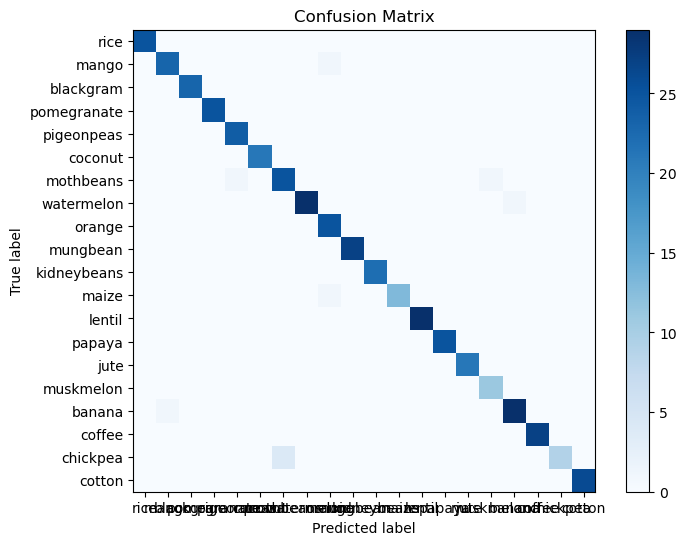

AUC-ROC: 0.9998789655675617


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sk

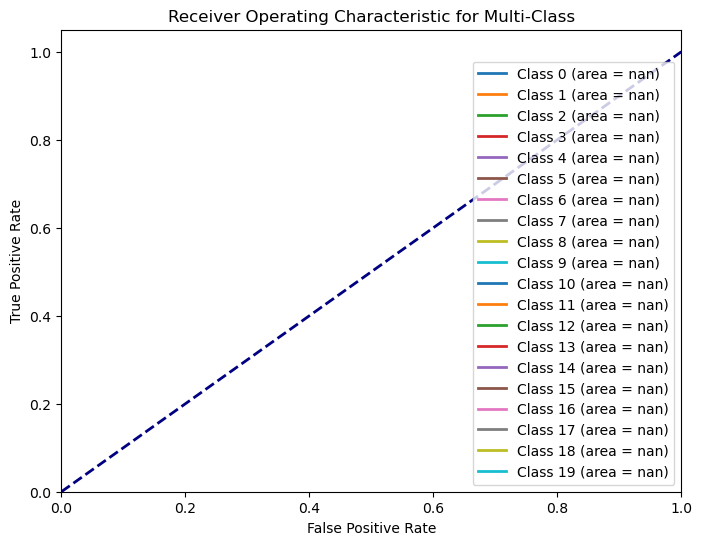

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: N

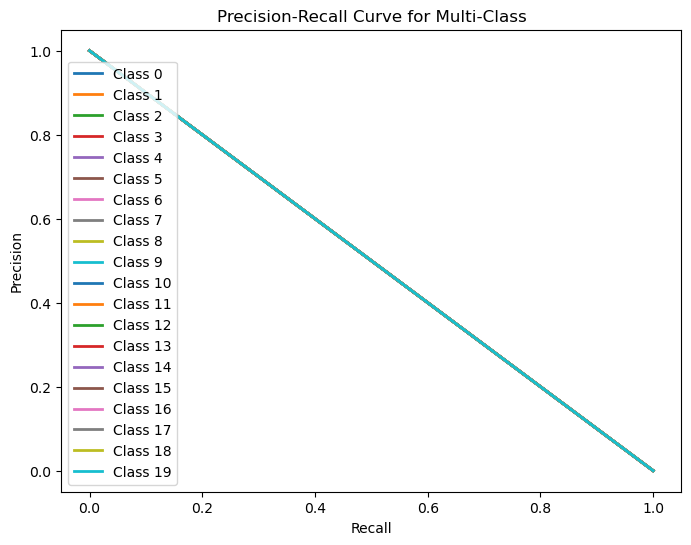

Cross-Validation Accuracy Scores:  [0.97864769 0.97508897 0.98220641 0.97153025 0.98571429]
Mean Cross-Validation Accuracy:  0.9786375190645653
Cross-Validated Confusion Matrix:
 [[75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 76  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 78  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 68  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0 69  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  1  0  0  0  0  0  0 72  0  0  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 73  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 78  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  0  0 47  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 71  0  0  0  0  0  0  0]
 [

In [410]:
evaluate_model(best_log_reg,X_test,Y_test,"best logistic regression")

# Random Forest

In [411]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,Y_train)

predicted_values = RF.predict(X_test)

x = metrics.accuracy_score(Y_test, predicted_values)
print("RF's Accuracy is: ", x)


RF's Accuracy is:  0.9914712153518124


['watermelon' 'jute' 'pigeonpeas' 'chickpea' 'maize' 'kidneybeans'
 'banana' 'papaya' 'coffee' 'pomegranate' 'banana' 'jute' 'rice' 'cotton'
 'pomegranate' 'chickpea' 'coconut' 'mango' 'pomegranate' 'jute' 'papaya'
 'maize' 'kidneybeans' 'jute' 'banana' 'chickpea' 'maize' 'coconut'
 'maize' 'lentil' 'blackgram' 'lentil' 'pomegranate' 'watermelon'
 'watermelon' 'mothbeans' 'blackgram' 'rice' 'watermelon' 'pomegranate'
 'coffee' 'pigeonpeas' 'pomegranate' 'coconut' 'banana' 'lentil' 'lentil'
 'rice' 'rice' 'banana' 'orange' 'maize' 'lentil' 'papaya' 'pigeonpeas'
 'lentil' 'muskmelon' 'coffee' 'jute' 'coconut' 'blackgram' 'blackgram'
 'coffee' 'chickpea' 'lentil' 'muskmelon' 'kidneybeans' 'jute'
 'pomegranate' 'kidneybeans' 'watermelon' 'pomegranate' 'kidneybeans'
 'watermelon' 'cotton' 'orange' 'cotton' 'mango' 'pigeonpeas' 'lentil'
 'jute' 'blackgram' 'maize' 'cotton' 'pomegranate' 'muskmelon' 'orange'
 'pomegranate' 'blackgram' 'pomegranate' 'watermelon' 'watermelon' 'mango'
 'orange' 

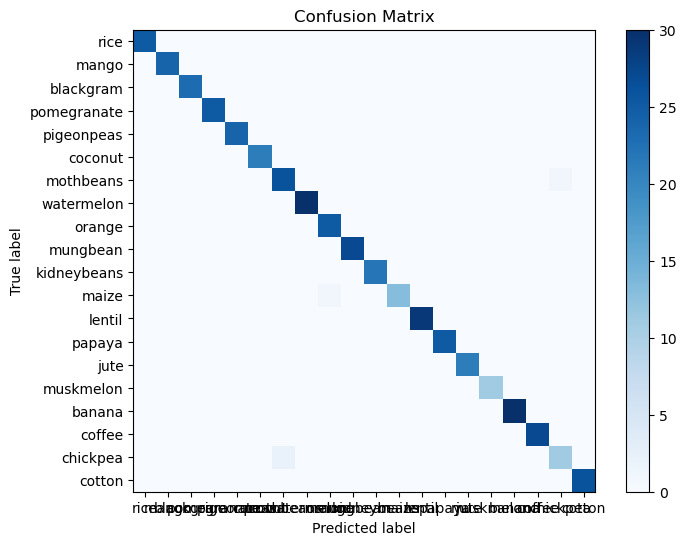

AUC-ROC: 0.9998612158538629


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sk

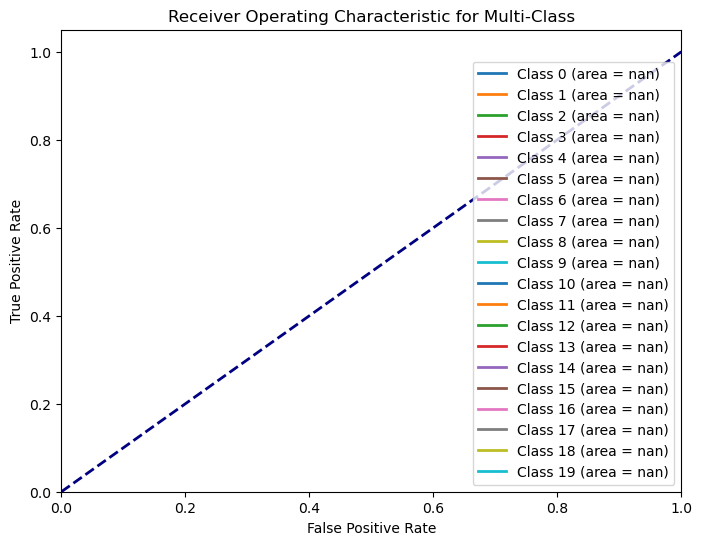

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: N

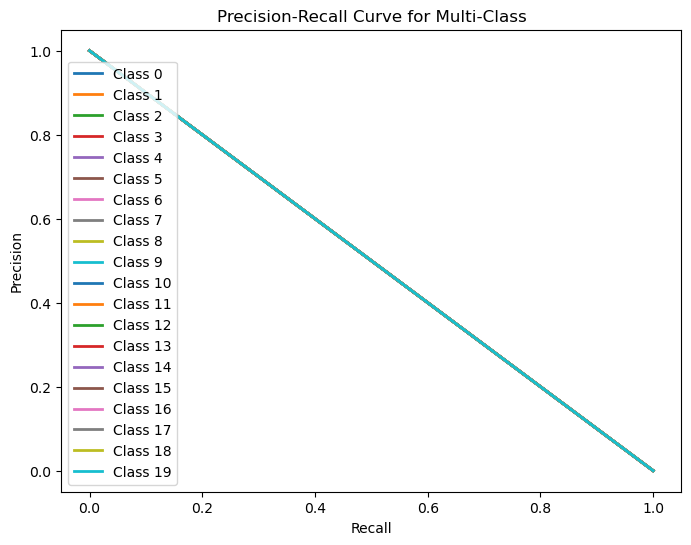

Cross-Validation Accuracy Scores:  [0.98932384 0.99288256 0.98220641 0.98932384 0.99285714]
Mean Cross-Validation Accuracy:  0.9893187595322827
Cross-Validated Confusion Matrix:
 [[75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 76  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 79  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 75  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 73  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 78  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  0  0 48  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 71  0  0  0  0  0  0  0]
 [

In [412]:
evaluate_model(RF,X_test,Y_test,"Random Forest")

In [413]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           
                           verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Get the best estimator from the grid search
best_RF = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None,

[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, 

[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None,

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt

[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=log2

[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=lo

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=sqrt, min

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt

[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=log2

[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, max_features=lo

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, mi

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt

[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2

[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=lo

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\aryan\anaconda3\Lib\site-packa

['watermelon' 'jute' 'pigeonpeas' 'chickpea' 'maize' 'kidneybeans'
 'banana' 'papaya' 'coffee' 'pomegranate' 'banana' 'jute' 'rice' 'cotton'
 'pomegranate' 'chickpea' 'coconut' 'mango' 'pomegranate' 'jute' 'papaya'
 'maize' 'kidneybeans' 'jute' 'banana' 'chickpea' 'maize' 'coconut'
 'maize' 'lentil' 'blackgram' 'lentil' 'pomegranate' 'watermelon'
 'watermelon' 'mothbeans' 'blackgram' 'rice' 'watermelon' 'pomegranate'
 'coffee' 'pigeonpeas' 'pomegranate' 'coconut' 'banana' 'lentil' 'lentil'
 'rice' 'rice' 'banana' 'orange' 'maize' 'lentil' 'papaya' 'pigeonpeas'
 'lentil' 'muskmelon' 'coffee' 'jute' 'coconut' 'blackgram' 'blackgram'
 'coffee' 'chickpea' 'lentil' 'muskmelon' 'kidneybeans' 'jute'
 'pomegranate' 'kidneybeans' 'watermelon' 'pomegranate' 'kidneybeans'
 'watermelon' 'cotton' 'orange' 'cotton' 'mango' 'pigeonpeas' 'lentil'
 'jute' 'blackgram' 'maize' 'cotton' 'pomegranate' 'muskmelon' 'orange'
 'pomegranate' 'blackgram' 'pomegranate' 'watermelon' 'watermelon' 'mango'
 'orange' 

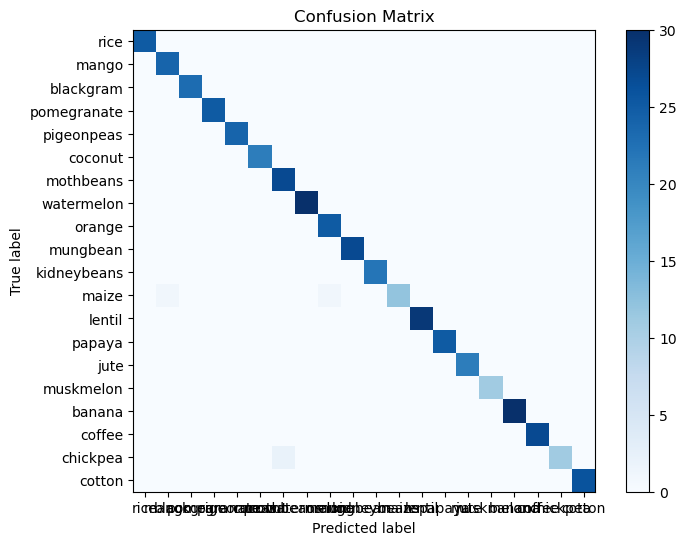

AUC-ROC: 0.9999248948342269


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sk

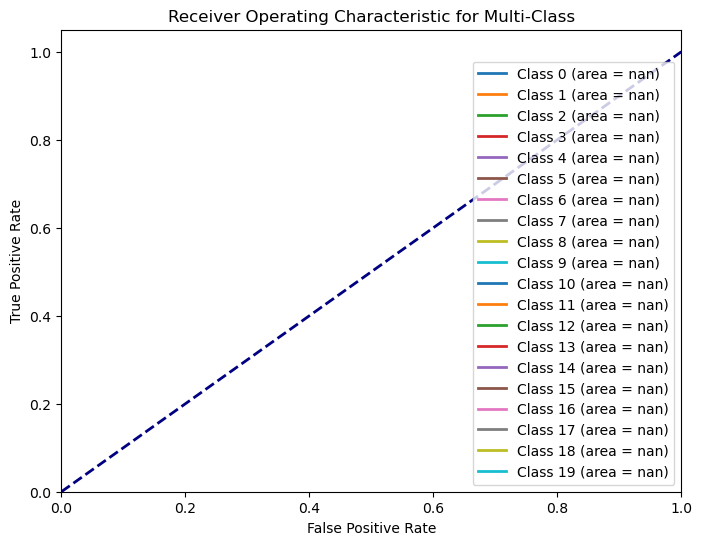

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: N

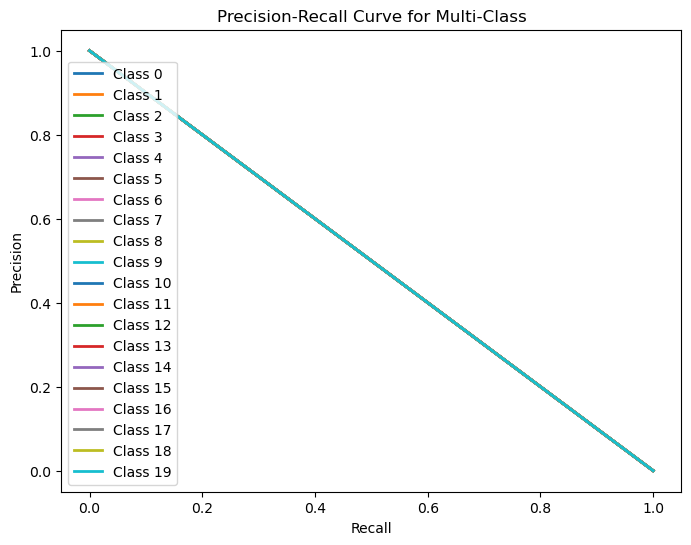

Cross-Validation Accuracy Scores:  [1.         0.99644128 0.98576512 0.98932384 0.99285714]
Mean Cross-Validation Accuracy:  0.9928774783934926
Cross-Validated Confusion Matrix:
 [[75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 68  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 76  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 79  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 72  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0 70  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 75  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 73  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 78  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0 49  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 71  0  0  0  0  0  0  0]
 [

In [414]:
evaluate_model(best_RF,X_test,Y_test,"best random forest")

# Support Vector Machine

In [415]:
from sklearn.svm import SVC
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train,Y_train)
predicted_values = SVM.predict(X_test)
x = metrics.accuracy_score(Y_test, predicted_values)
print("SVM's accuracy is: {}%".format(x * 100))

print(classification_report(Y_test,predicted_values))

SVM's accuracy is: 98.50746268656717%
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        25
   blackgram       0.92      1.00      0.96        24
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        25
      coffee       0.96      1.00      0.98        24
      cotton       1.00      1.00      1.00        21
        jute       0.89      0.93      0.91        27
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        27
       mango       1.00      1.00      1.00        22
   mothbeans       1.00      1.00      1.00        14
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        25
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00      1.00        11
  pigeonpeas       1.00      0.93      0.97

['watermelon' 'jute' 'pigeonpeas' 'chickpea' 'maize' 'kidneybeans'
 'banana' 'papaya' 'coffee' 'pomegranate' 'banana' 'rice' 'rice' 'cotton'
 'pomegranate' 'chickpea' 'coconut' 'mango' 'pomegranate' 'jute' 'papaya'
 'maize' 'kidneybeans' 'jute' 'banana' 'chickpea' 'maize' 'coconut'
 'maize' 'lentil' 'blackgram' 'lentil' 'pomegranate' 'watermelon'
 'watermelon' 'mothbeans' 'blackgram' 'rice' 'watermelon' 'pomegranate'
 'coffee' 'pigeonpeas' 'pomegranate' 'coconut' 'banana' 'lentil' 'lentil'
 'rice' 'rice' 'banana' 'orange' 'maize' 'lentil' 'papaya' 'pigeonpeas'
 'lentil' 'muskmelon' 'coffee' 'jute' 'coconut' 'blackgram' 'blackgram'
 'coffee' 'chickpea' 'lentil' 'muskmelon' 'kidneybeans' 'jute'
 'pomegranate' 'kidneybeans' 'watermelon' 'pomegranate' 'kidneybeans'
 'watermelon' 'cotton' 'orange' 'cotton' 'mango' 'pigeonpeas' 'lentil'
 'jute' 'blackgram' 'maize' 'cotton' 'pomegranate' 'muskmelon' 'orange'
 'pomegranate' 'blackgram' 'pomegranate' 'watermelon' 'watermelon' 'mango'
 'orange' 

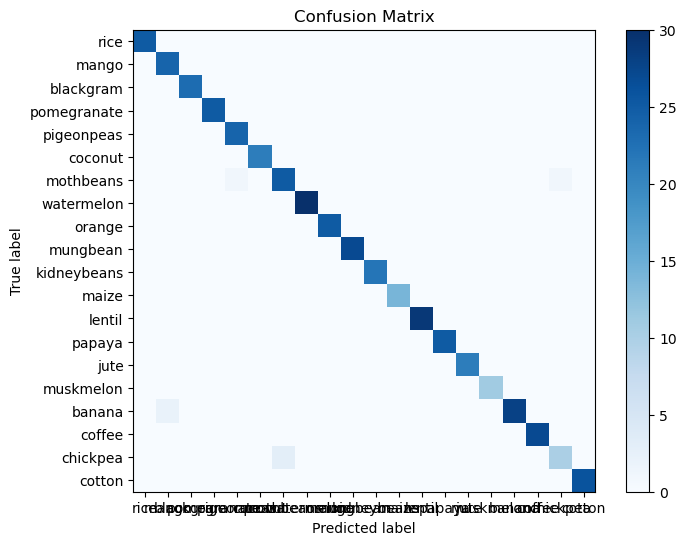

AttributeError: predict_proba is not available when  probability=False

In [416]:
evaluate_model(SVM,X_test,Y_test,"Support Vector Machine")

In [417]:
param_grid = {
    'kernel': ['poly'],
    'degree': [2, 3, 4],
    'C': [0.1, 1, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=SVC(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                       
                           verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Get the best estimator from the grid search
best_SVM = grid_search.best_estimator_

# Print the best parameters found and the best score
print("Best parameters found:")
print(grid_search.best_params_)
print()
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................C=0.1, degree=2, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=2, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=2, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=2, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=2, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=3, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=3, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=3, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=3, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=3, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=4, kernel=poly; total time=   0.0s
[CV] END .......................C=0.1, degree=4, 

In [418]:
predicted_values = best_SVM.predict(X_test)

In [419]:
acc.append(metrics.accuracy_score(Y_test, predicted_values))
model.append("best support vector machine")

In [420]:
print(acc)
print(model)

[0.9786780383795309, 0.9786780383795309, 0.9530916844349681, 0.9530916844349681, 0.9786780383795309, 0.9914712153518124, 0.9914712153518124, 0.9850746268656716, 0.9893390191897654]
['Decision Tree', 'best decision tree', 'Logistic Regression', 'Logistic Regression', 'best logistic regression', 'Random Forest', 'best random forest', 'Support Vector Machine', 'best support vector machine']


In [421]:
mapping = dict(list(zip(model,acc)))

In [422]:
mapping

{'Decision Tree': 0.9786780383795309,
 'best decision tree': 0.9786780383795309,
 'Logistic Regression': 0.9530916844349681,
 'best logistic regression': 0.9786780383795309,
 'Random Forest': 0.9914712153518124,
 'best random forest': 0.9914712153518124,
 'Support Vector Machine': 0.9850746268656716,
 'best support vector machine': 0.9893390191897654}

# Comapring Accuracies of models

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

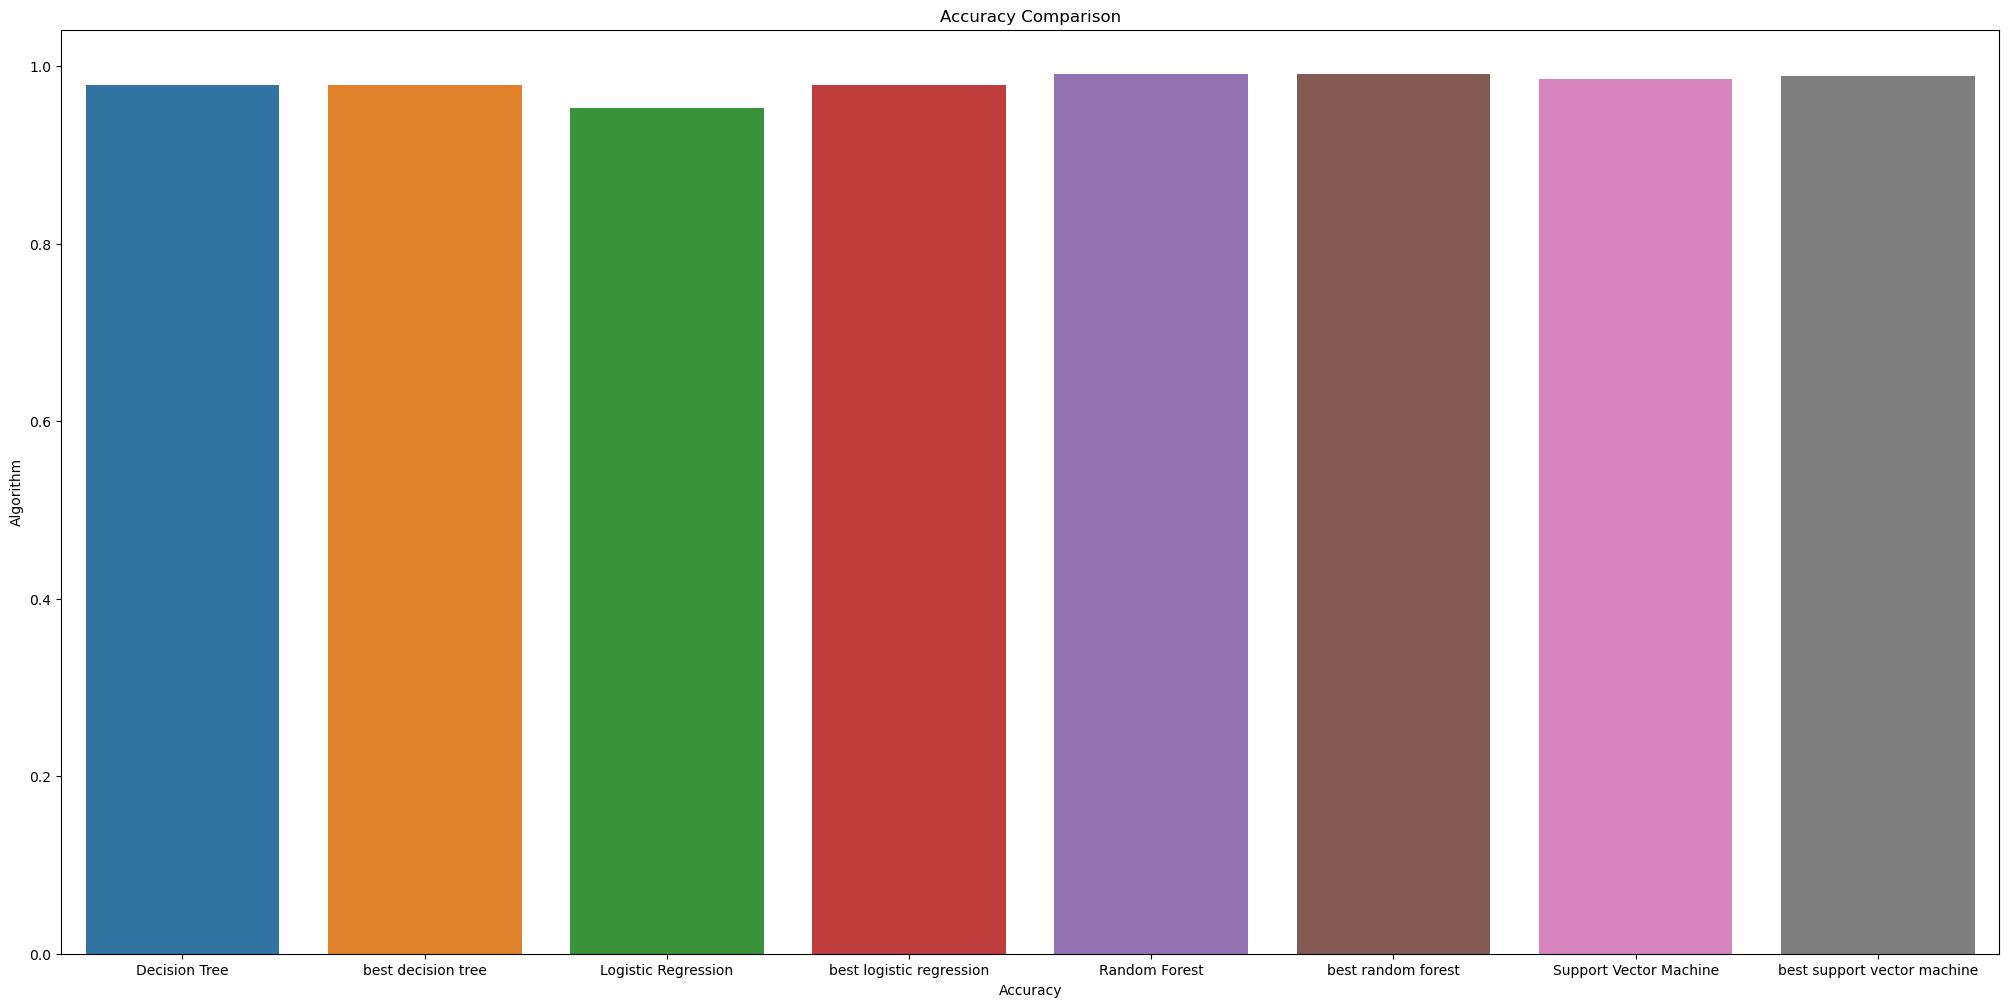

In [423]:
plt.figure(figsize=[25,12],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = model,y = acc)

In [424]:
best = list(mapping.items())
best.sort(key = lambda x:x[1],reverse = True)
best

[('Random Forest', 0.9914712153518124),
 ('best random forest', 0.9914712153518124),
 ('best support vector machine', 0.9893390191897654),
 ('Support Vector Machine', 0.9850746268656716),
 ('Decision Tree', 0.9786780383795309),
 ('best decision tree', 0.9786780383795309),
 ('best logistic regression', 0.9786780383795309),
 ('Logistic Regression', 0.9530916844349681)]

# Example of prediciton using Random Forest

In [425]:
def transform_input(data):
    d = data[0]
    for i in range(len(d)):
        if not idx_to_skew[i]:
            d[i] = np.square(d[i])
        else:
            d[i] = np.sqrt(d[i])
    x = []
    x.append(d)
    x = np.array(x)
    x = scaler.transform(x)
    return x

In [426]:
data = np.array([[59,70,84,17,19,7.6,83]]) #input by the user
data = transform_input(data)
prediction = best_RF.predict(data) #random forest model predicts the best crop for the given parameters provided by the user
print(prediction)

['chickpea']


C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [460]:
best_RF.predict_proba(data)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [446]:
import numpy as np

# Get the predicted probabilities
probabilities = best_RF.predict_proba(data)

# Get the index of the highest probability for each sample
highest_prob_class_indices = np.argmax(probabilities, axis=1)

# Retrieve the corresponding class labels
highest_prob_classes = best_RF.classes_
print(highest_prob_classes)
# Print the results
print(highest_prob_classes[highest_prob_class_indices])

['banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton' 'jute'
 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans' 'mungbean' 'muskmelon'
 'orange' 'papaya' 'pigeonpeas' 'pomegranate' 'rice' 'watermelon']
['chickpea']


In [428]:
best_RF.predict_proba(data)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [ ]:
import pickle

In [429]:
pickle.dump(best_RF,open('best_RF.pkl','wb'))

In [430]:

array_data = X_train
# Convert the NumPy array to a DataFrame
df = pd.DataFrame(array_data, columns=[
    'NITROGEN', 'PHOSPHORUS', 'POTASSIUM', 'TEMPERATURE', 'HUMIDITY', 'PH', 'RAINFALL'
])

# Export the DataFrame to a CSV file
df.to_csv('input_training.csv', index=False)

print("CSV file 'crop_data.csv' has been created successfully.")


CSV file 'crop_data.csv' has been created successfully.


In [455]:
p =transform_input(np.array([[89,11,83,0,50,7,100]]))

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [456]:
p


array([[ 0.76337004,  0.01066667,  0.9685623 , -0.15705128,  0.23500612,
         0.55288462,  0.48886281]])

In [457]:
predict = best_RF.predict(p)
predict

array(['coffee'], dtype=object)

In [459]:
best_RF.predict_proba(p)

array([[0.02      , 0.        , 0.157     , 0.        , 0.204     ,
        0.        , 0.06333333, 0.        , 0.        , 0.095     ,
        0.184     , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.08      , 0.        , 0.19666667]])

In [458]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)